## Context

- *AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).*

- *A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.*

- *As Data Scientist, We have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.*

**Objective :**

- To predict:
    - *whether a liability customer will buy a personal loan or not.*
    - *Which variables are most significant.*
    - *Which segment of customers should be targeted more.*
 
**Data Dictionary:**

- *ID: Customer ID*
- *Age: Customer’s age in completed years*
- *Experience: #years of professional experience*
- *Income: Annual income of the customer (in thousand dollars)*
- *ZIP Code: Home Address ZIP code.*
- *Family: the Family size of the customer*
- *CCAvg: Average spending on credit cards per month (in thousand dollars)*
- *Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional*
- *Mortgage: Value of house mortgage if any. (in thousand dollars)*
- *Personal_Loan: Did this customer accept the personal loan offered in the last campaign?* ====> Target variable : 'Personal_Loan'. The number of borrowers is quite small and the depositors are majority
- *Securities_Account: Does the customer have securities account with the bank?*
- *CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?*
- *Online: Do customers use internet banking facilities?*
- *CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?*

# Let's start by importing necessary libraries

In [163]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# To get diferent metric scores

from sklearn.metrics import (
    precision_recall_fscore_support,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
    roc_curve,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load and overview the dataset

In [164]:
# Loading the dataset
loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [165]:
# copying data to another variable to avoid any changes to original data
data = loan.copy()

<IPython.core.display.Javascript object>

#### View the first and last 5 rows of the dataset

In [166]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [167]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

#### Understand the shape of the dataset

In [168]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

- *The dataset has 5000 columns and 14 columns*

#### Check the data types of the columns for the dataset

In [169]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

- All the columns are infered to be numerical, even though 'ID', 'ZIPCode', 'Education', "Family", 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online' and 'CreditCard' which are categorical variables
- The columns mentionned above should be convert into categorical variables
- The column 'ID' should be dropped. It doesn't provide any relevant information
- There are no missing values in the dataset

In [171]:
# Drop column ID
data.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [172]:
# checking for duplicate values in the data
data.duplicated().sum()  # we have one duplicate row

0

<IPython.core.display.Javascript object>

- There is no duplicates rows in the dataset

#### Making categoricals into categorical types

In [173]:
cat_vars = [
    "ZIPCode",
    "Education",
    "Family",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    data[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


<IPython.core.display.Javascript object>

# Summary of the dataset

In [174]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


<IPython.core.display.Javascript object>

**Observations:**

   - *`Age`: Average age of customers in the dataset is 45.34 years. The variable `Age` has a wide range from 23 to 67 years old. It is almost normal distributed. The median age is 45 years old. This shows that the majority of customers are under 45.34 years of age*
   - *`Experience`: The average of professional experience of customers in the dataset is approx 20.1 years but there is a wide range with values from -3 to 43. We will impute the negative values of the column with their absolute values. The column `Experience` looks normal distributed*
   - *`Income`: The average of the annual income of the customers in the dataset is approx 73.8 thousands dollars. The variable is right skewed. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable. We will explore this further in univariate analysis*
   - *`CCAvg`: There is a huge difference in the 75th percentile and the maximum value of the Average spending on credit cards per month, indicating the presence of outliers. The variable is right skewed with the Mean approx at 1.94 thousands dollars and the Median at 1.5 thousands dollars*
   - *`Mortgage`: Value of house mortgage if any is right skewed as the Median is null and the Mean is approx 56.5 thousands dollars. A vast difference in 75th percentile and the maximum values, indicates that there might be outliers present in the variable.*

**Lets us look at different levels in categorical variables**

In [175]:
# filtering object type columns
cat_columns = data.describe(include=["category"]).columns
cat_columns

Index(['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

In [176]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("-" * 50)

Unique values in ZIPCode are :
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
92093     51
90024     50
90245     50
91330     46
90089     46
92121     45
94304     45
94143     37
94608     34
95051     34
92028     32
92521     32
92182     32
95054     31
95814     30
95014     29
94550     27
94301     27
94542     27
93407     26
94501     26
95064     26
95039     26
95819     26
91107     25
94105     25
95060     25
94303     25
94022     25
93117     24
94596     24
94080     23
93555     23
95521     23
92717     22
92612     22
91380     22
94110     21
92647     21
91768     21
94117     20
94132     20
90401     20
90034     20
95747     19
94005     19
92697     19
92122     19
90266     19
90025     19
92130     18
90840     18
94309     18
94709     18
93940     18
90291     18
94122     18
92096     17
93023     17
90740     17
92691     17
90630     17
91311     17
92120     17
92009  

<IPython.core.display.Javascript object>

- *There are many distinct values in ZIPCode column. We will extract the name of cities or states and keep the main ones*
- *There are values with '0' in CreditCard column than '1'*
- *There are values with '1' in Online column than '0'*
- *There are values with '0' in CD_Account column than '1'*
- *There are values with '0' in Securities_Account column than '1'*
- *There are values with '0' in Personal_Loan column than '1'*
- *There are more Undergrad customers in the dataset, followed by Advanced/Professional and then Graduate customers*
- *There are more customers with family size at 1, followed by those with 2 members, then 4 members and finally those with 3 members*
- *There is no special characters in the categorical variables*

### Dealing with zip codes

#### Mapping zip codes to different locations 

In [177]:
from uszipcode import SearchEngine

engine = SearchEngine()

<IPython.core.display.Javascript object>

###### Extract City information

In [178]:
def zcode(x):
    zipcode = engine.by_zipcode(x)
    if zipcode:
        return zipcode.major_city
    else:
        return None

<IPython.core.display.Javascript object>

In [179]:
data["City"] = data["ZIPCode"].apply(zcode)

<IPython.core.display.Javascript object>

###### Extract zip information

In [180]:
def code(x):
    zipcode = engine.by_zipcode(x)
    if zipcode:
        return zipcode.zipcode
    else:
        return None

<IPython.core.display.Javascript object>

In [181]:
data["zip"] = data["ZIPCode"].apply(code)

<IPython.core.display.Javascript object>

###### Extract state information

In [182]:
def state(x):
    zipcode = engine.by_zipcode(x)
    if zipcode:
        return zipcode.state
    else:
        return None

<IPython.core.display.Javascript object>

In [183]:
data["state"] = data["ZIPCode"].apply(state)

<IPython.core.display.Javascript object>

### displaying of the head of the dataset

In [184]:
data.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,zip,state
2511,51,27,92,92121,4,3.0,1,0,1,0,1,1,1,San Diego,92121,CA
2371,32,6,111,95014,2,1.5,3,0,0,0,0,0,0,Cupertino,95014,CA
2147,27,3,20,92007,4,1.0,1,0,0,0,0,0,0,Cardiff By The Sea,92007,CA
4145,58,34,63,94305,4,1.6,2,0,0,0,0,0,0,Stanford,94305,CA
4844,31,6,81,90840,2,2.5,1,313,0,0,0,0,0,Long Beach,90840,CA


<IPython.core.display.Javascript object>

In [185]:
# dropping column name
data.drop(["ZIPCode", "zip"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### missing values

In [186]:
data.isnull().sum()

Age                    0
Experience             0
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  34
state                 34
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in the columns `City` and `state`
* The number of missing values in the columns `City` and `states` are equal (That means that probably means that the missing values are on the same rows)

In [187]:
# summury of the dataset
data.describe(exclude="number").T

,count,unique,top,freq
Family,5000,4,1,1472
Education,5000,3,1,2096
Personal_Loan,5000,2,0,4520
Securities_Account,5000,2,0,4478
CD_Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530
City,4966,244,Los Angeles,375
state,4966,1,CA,4966


<IPython.core.display.Javascript object>

* The most important Family size is 1.
* The top frequent level of education is level 1 (Undergrad).
* The most recurrent Personal_Loan is 0 (not accepted).
* The most repeated Securities_Account is 0 (the customer don't have securities account with the bank).
* The top constant CD_Account is 0 (the customer don't have a certificate of deposit (CD) account with the bank).
* The most important Online is 1 (the customers use internet banking facilities).
* The top constant CreditCard is 0 (the customer don't have a certificate of deposit (CD) account with the bank).
* The top frequent city is Los Angeles.
* The unique valid state extracted from the ZIPCode was CA. 


* We have zipcode which didin't correspond neither to cities nor to states. We'll not drop them.
* Only 4966 zipcodes correspond to cities and states
* Only one state is identified : California (CAL)

## Processing of some variables

**Column City**

In [188]:
data["City"].describe().T

count            4966
unique            244
top       Los Angeles
freq              375
Name: City, dtype: object

<IPython.core.display.Javascript object>

In [189]:
data["City"].value_counts(dropna=False)

Los Angeles               375
San Diego                 269
San Francisco             257
Berkeley                  241
Sacramento                148
Palo Alto                 130
Stanford                  127
Davis                     121
La Jolla                  112
Santa Barbara             103
San Jose                   96
Santa Clara                77
Monterey                   72
Pasadena                   71
Irvine                     58
Oakland                    55
Newbury Park               53
Claremont                  52
Menlo Park                 52
Santa Cruz                 51
El Segundo                 50
Riverside                  46
Northridge                 46
Hayward                    41
Redwood City               37
Los Altos                  36
Huntington Beach           35
Santa Monica               35
Emeryville                 34
Livermore                  34
NaN                        34
San Luis Obispo            33
Fallbrook                  32
Fremont   

<IPython.core.display.Javascript object>

**Column state**

In [190]:
data["state"].describe().T

count     4966
unique       1
top         CA
freq      4966
Name: state, dtype: object

<IPython.core.display.Javascript object>

In [191]:
data["state"].unique()

array(['CA', None], dtype=object)

<IPython.core.display.Javascript object>

In [192]:
data["state"].value_counts(dropna=False)

CA     4966
NaN      34
Name: state, dtype: int64

<IPython.core.display.Javascript object>

In [193]:
# first we will fill missing values in the column state by 'Others'
data.state.fillna("Others", inplace=True)
data.state.isnull().sum()

0

<IPython.core.display.Javascript object>

In [194]:
# displaying of 5 sampled rows
data.sample(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,state
4121,53,27,65,4,2.80,2,0,0,0,0,0,1,Claremont,CA
3171,39,12,62,3,2.33,2,0,0,0,0,0,0,Chula Vista,CA
4304,64,39,98,3,1.80,2,80,0,0,0,1,0,Roseville,CA
2646,45,20,191,3,2.60,3,123,1,0,0,0,0,Cardiff By The Sea,CA
4554,41,16,109,3,1.00,1,0,0,1,0,1,0,Richmond,CA


<IPython.core.display.Javascript object>

In [195]:
# information on the dataset at this point
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  City                4966 non-null   object  
 13  state               5000 non-null   object  
dtypes: category(7), float64(1), int64(4), object(2)
memory usage: 308.7+ KB


<IPython.core.display.Javascript object>

* There are missing values in the column City

In [196]:
# count of unique values in descending order
value_count = data.City.value_counts()
value_count

Los Angeles               375
San Diego                 269
San Francisco             257
Berkeley                  241
Sacramento                148
Palo Alto                 130
Stanford                  127
Davis                     121
La Jolla                  112
Santa Barbara             103
San Jose                   96
Santa Clara                77
Monterey                   72
Pasadena                   71
Irvine                     58
Oakland                    55
Newbury Park               53
Claremont                  52
Menlo Park                 52
Santa Cruz                 51
El Segundo                 50
Riverside                  46
Northridge                 46
Hayward                    41
Redwood City               37
Los Altos                  36
Santa Monica               35
Huntington Beach           35
Emeryville                 34
Livermore                  34
San Luis Obispo            33
Fallbrook                  32
Goleta                     31
Fremont   

<IPython.core.display.Javascript object>

* There are too many cities in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those cities with at least as many entries as the threshold.

In [197]:
# we take 20 as threshold
threshold = 20
value_count[value_count.values >= threshold]

Los Angeles            375
San Diego              269
San Francisco          257
Berkeley               241
Sacramento             148
Palo Alto              130
Stanford               127
Davis                  121
La Jolla               112
Santa Barbara          103
San Jose                96
Santa Clara             77
Monterey                72
Pasadena                71
Irvine                  58
Oakland                 55
Newbury Park            53
Claremont               52
Menlo Park              52
Santa Cruz              51
El Segundo              50
Riverside               46
Northridge              46
Hayward                 41
Redwood City            37
Los Altos               36
Santa Monica            35
Huntington Beach        35
Emeryville              34
Livermore               34
San Luis Obispo         33
Fallbrook               32
Goleta                  31
Fremont                 31
Cupertino               29
Carlsbad                28
Torrance                28
M

<IPython.core.display.Javascript object>

In [198]:
# list of cities
cities_list = value_count[value_count.values > threshold].index.tolist()
print("Cities names taken into consideration:", len(cities_list), cities_list)

Cities names taken into consideration: 50 ['Los Angeles', 'San Diego', 'San Francisco', 'Berkeley', 'Sacramento', 'Palo Alto', 'Stanford', 'Davis', 'La Jolla', 'Santa Barbara', 'San Jose', 'Santa Clara', 'Monterey', 'Pasadena', 'Irvine', 'Oakland', 'Newbury Park', 'Claremont', 'Menlo Park', 'Santa Cruz', 'El Segundo', 'Riverside', 'Northridge', 'Hayward', 'Redwood City', 'Los Altos', 'Santa Monica', 'Huntington Beach', 'Emeryville', 'Livermore', 'San Luis Obispo', 'Fallbrook', 'Goleta', 'Fremont', 'Cupertino', 'Carlsbad', 'Torrance', 'Moss Landing', 'Arcata', 'Alameda', 'Walnut Creek', 'Roseville', 'South San Francisco', 'Ridgecrest', 'Mountain View', 'Santa Clarita', 'Vallejo', 'San Marcos', 'Pomona', 'Fullerton']


<IPython.core.display.Javascript object>

* >20 looks to be a good threshold.
* We will keep only home cities in which live more than 20 customers, and the rest we will assign as 'Others'.

* We will now assign the value others to the names of cities with value_counts under the threshold.

In [199]:
# first we will fill missing values, if any, in the columns by 'Others'
data.City.fillna("Others", inplace=True)
data.City.isnull().sum()

0

<IPython.core.display.Javascript object>

In [200]:
city_val = []

for i in range(data.shape[0]):  # iterate over all rows in data
    txt = data.City.values[i]  # getting the values in City column
    flag = 0  # flag variable
    for item in cities_list:  # iterate over the list of cities considered
        if item in txt and flag == 0:  # checking if city name is in the row
            city_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        city_val.append("Others")

# we will strip the leading and trailing ', and assign the values to a column
data["Cities_choosen"] = [item for item in city_val]
data.sample(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,state,Cities_choosen
4496,51,25,45,4,2.60,1,0,0,0,0,0,0,Davis,CA,Davis
4711,65,40,59,3,2.40,1,0,0,0,0,0,0,Los Altos,CA,Los Altos
4362,28,2,55,3,1.10,2,0,0,0,0,0,0,Monterey,CA,Monterey
1975,29,3,113,2,0.20,1,0,0,0,0,1,1,San Francisco,CA,San Francisco
1559,59,35,102,4,3.00,2,115,1,0,0,1,0,Laguna Niguel,CA,Others
4715,65,39,35,1,0.50,3,150,0,0,0,1,0,Carlsbad,CA,Carlsbad
3102,49,25,30,4,0.90,2,0,0,0,0,0,1,Los Angeles,CA,Los Angeles
2014,49,19,169,3,5.67,3,167,1,0,1,0,1,Santa Clara,CA,Santa Clara
4835,65,39,25,2,0.40,1,113,0,0,0,1,0,Sonora,CA,Others
4193,62,37,31,3,0.20,1,0,0,0,0,1,0,Campbell,CA,Others


<IPython.core.display.Javascript object>

#### We will now drop the `City` column.

In [201]:
data.drop("City", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [202]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,2.0,0.0,4520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,5000.0,2.0,0.0,4698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Replace the negative variables in `Experience` column by their absolute values

In [203]:
wrong_val = data[data["Experience"] < 0]
wrong_val
print(wrong_val.shape)

(52, 14)


<IPython.core.display.Javascript object>

There are 52 rows with negative values in the column `Experience` 

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  state               5000 non-null   object  
 13  Cities_choosen      5000 non-null   object  
dtypes: category(7), float64(1), int64(4), object(2)
memory usage: 308.7+ KB


<IPython.core.display.Javascript object>

In [205]:
# calculation of the opposite of values in the column `Experience`
data["Experience"] = data["Experience"].abs()

<IPython.core.display.Javascript object>

In [206]:
# checking of the values of the column
data["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
29    124
22    124
7     121
8     119
15    119
6     119
10    118
33    117
13    117
37    116
11    116
36    114
4     113
21    113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

As we can see, there is no more negative values in the column `Experience`

#### Summary of the dataset after the changes in 'Experience' column

In [207]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


<IPython.core.display.Javascript object>

The median value of the column 'Experience' has not changed

# Univariate Analysis

In [208]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on Age

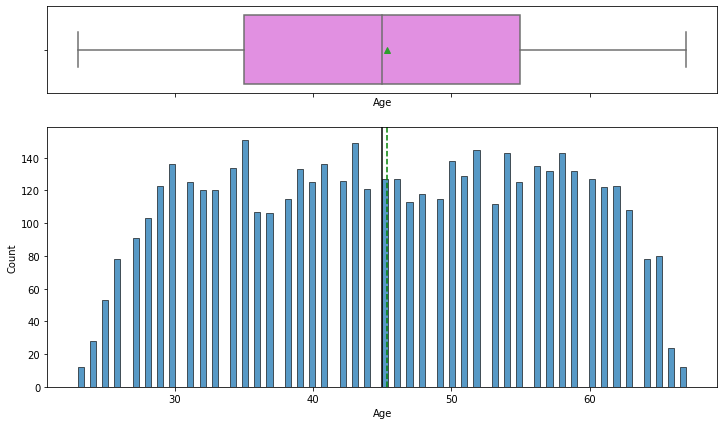

<IPython.core.display.Javascript object>

In [209]:
histogram_boxplot(data, "Age", bins=100)

* Age has no outliers. It is in fact, either right-skewed nor normal distributed but it has many peaks at around 35, 42, etc. 

#### Observations on Experience

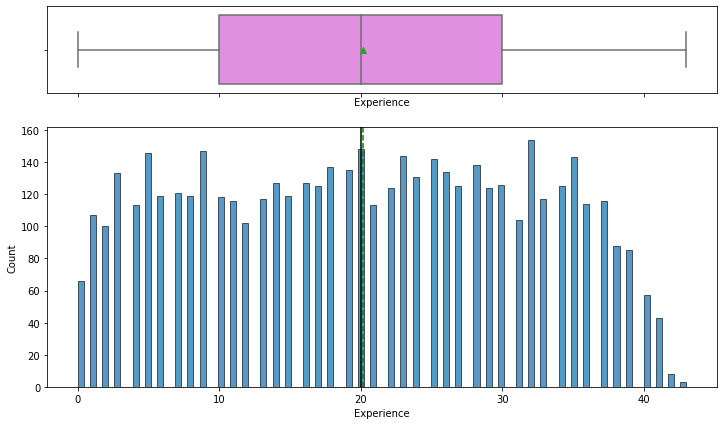

<IPython.core.display.Javascript object>

In [210]:
histogram_boxplot(data, "Experience", bins=100)

`Experience` looks almost normal distributed. It has no outliers

#### Observations on Income

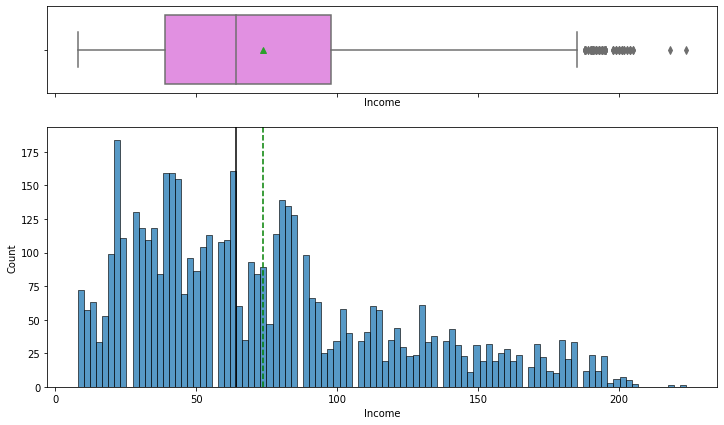

<IPython.core.display.Javascript object>

In [211]:
histogram_boxplot(data, "Income", bins=100)

* Most of the data is concentrated around 20 and 80 thousands dollars. This give a sense that, most of the observations in data might be customers earning around 20k and 80k dollars per year.
* The boxplot shows that there are outliers at the right end
* We will not treat these outliers as they represent the real market trend

#### Observations on CCAvg

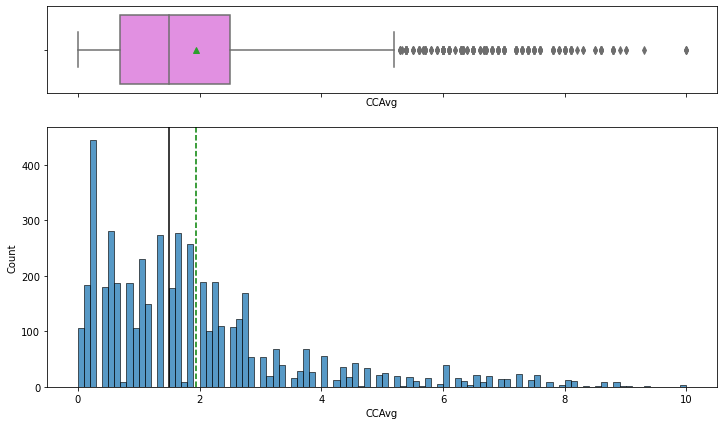

<IPython.core.display.Javascript object>

In [212]:
histogram_boxplot(data, "CCAvg", bins=100)

* The distribution of the `CCAvg` amount of expenses on credit cards per month, is right-skewed
* The boxplot shows that there are outliers at the right end
* We will not treat these outliers as they represent the real market trend

#### Observations on Mortgage

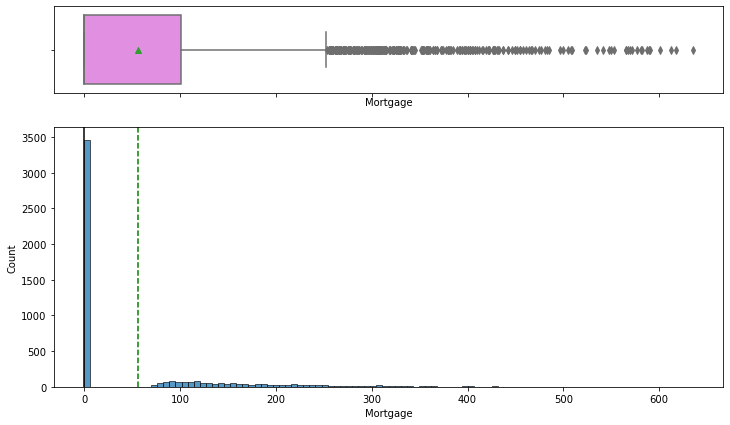

<IPython.core.display.Javascript object>

In [213]:
histogram_boxplot(data, "Mortgage", bins=100)

* Most of the data is concentrated around 0 dollar. Which gives sens that the most observations in data might be customers that they seem to be customers whom the bank trusts or customers on whom the bank has already ensured the risk of bankruptcy.
* Some of the observations are clear outliers that we will not treat these outliers as they represent the real market trend.

In [214]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on Personal_Loan

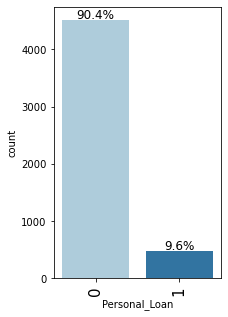

<IPython.core.display.Javascript object>

In [215]:
labeled_barplot(data, "Personal_Loan", perc=True)

* ~9% of the observations are customers who accepted the personal loan offered in the last campaign. So, 1 ====> Success
* ~91% did not accept. 0 ====> Not success.
* The class distribution in the target variable is imbalanced

#### Observations on Securities_Account

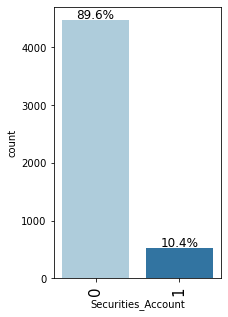

<IPython.core.display.Javascript object>

In [216]:
labeled_barplot(data, "Securities_Account", perc=True)

* In addition to a fiduciary deposit, approx 10.4% of customers have securities account. 1 ======> Yes
* Approx 90.6% of customers don't have securities account. 0 ======> No

#### Observations on CD_Account

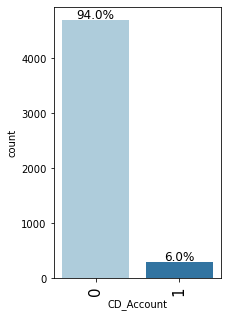

<IPython.core.display.Javascript object>

In [217]:
labeled_barplot(data, "CD_Account", perc=True)

* Approx approx 94% of customers don't have a certificate of deposit account with the bank. 0 ======> No
* While approx 6% have certificate of deposit account with the bank. 1 ======> Yes

#### Observations on Online

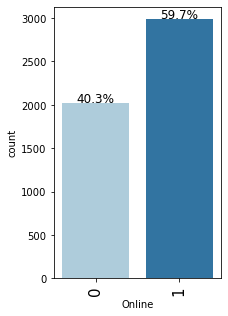

<IPython.core.display.Javascript object>

In [218]:
labeled_barplot(data, "Online", perc=True)

* Approx approx 40% of customers don't use internet banking facilities. 0 ======> No
* Approx 60% of customers use internet banking facilities. 1 ======> Yes

#### Observations on CreditCard

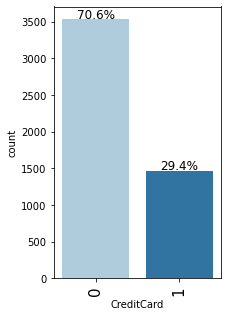

<IPython.core.display.Javascript object>

In [219]:
labeled_barplot(data, "CreditCard", perc=True)

* Approx approx 30% of customers use a credit card issued by any other Bank. 1 ======> Yes
* Approx 70% of customers don't use a credit card issued by any other Bank. 0 ======> No

- **Except the Personal_Loan variable that classes were indicated in the problem statement, we had to infer the classes of the other variables that showed classes. 0 for No and 1 for Yes**

#### Observations on Family

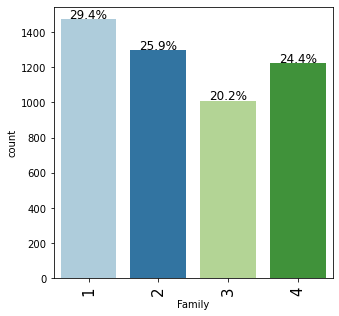

<IPython.core.display.Javascript object>

In [220]:
labeled_barplot(data, "Family", perc=True)

* ~30% of the observations are customers with 1 member family.
* ~26% of the observations are customers with 2 members family.
* ~25% of the observations are customers with 4 members family.
* ~20% of the observations are customers with 3 members family.

#### Observations on Education

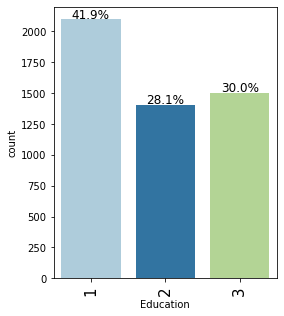

<IPython.core.display.Javascript object>

In [221]:
labeled_barplot(data, "Education", perc=True)

* Approx 42% of customers of the bank are Undergrad
* Approx 28% are Graduate
* And approx 30% of them are Advanced/Professional
* So, 58% of customers of the bank are at least Graduate

#### Observations on Cities_choosen

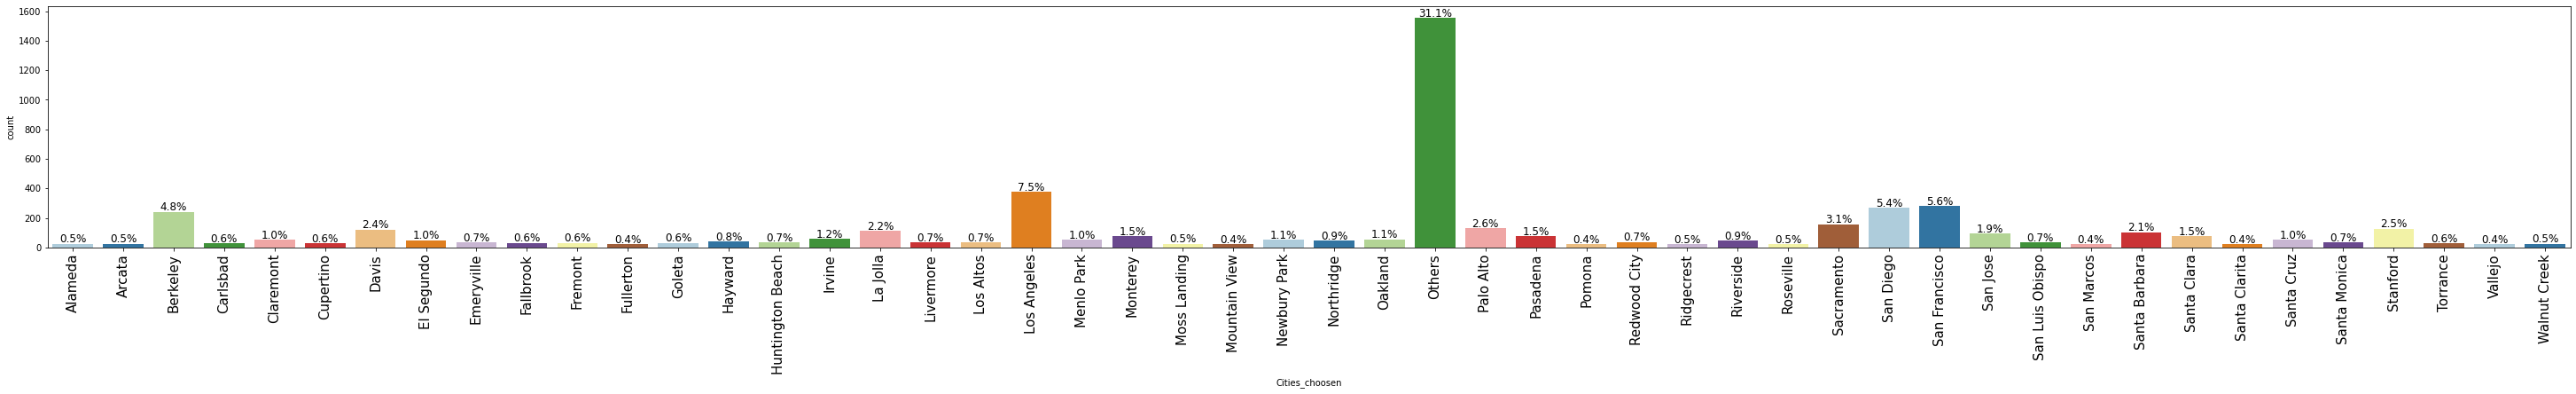

<IPython.core.display.Javascript object>

In [222]:
labeled_barplot(data, "Cities_choosen", perc=True)

* Los Angeles is the most common city name, followed by San Francisco, San Diego and Berkeley

#### Observations on state

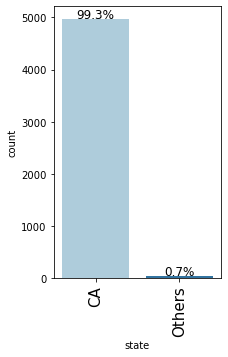

<IPython.core.display.Javascript object>

In [223]:
labeled_barplot(data, "state", perc=True)

* 99.3% of States represented correspond to CA.
* Almost all the customers of the bank live in California

# Bivariate Analysis

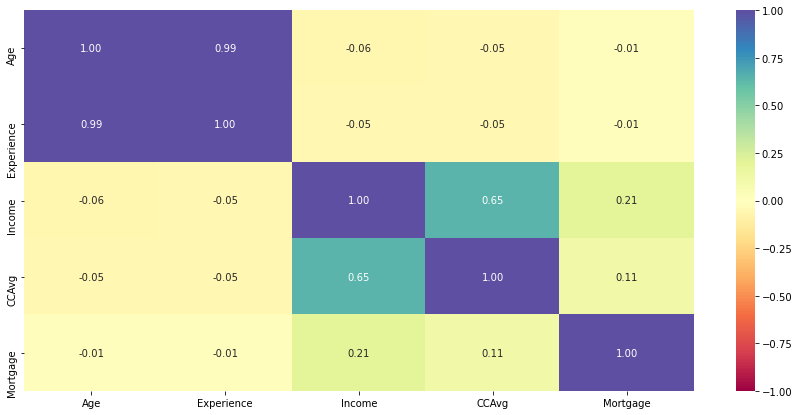

<IPython.core.display.Javascript object>

In [224]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is significant correlation between some columns:

    - *`Age` and `Experience` with a high correlation at 0.99*
    - *`Income` and `CCAvg` with an important correlation at 0.65*

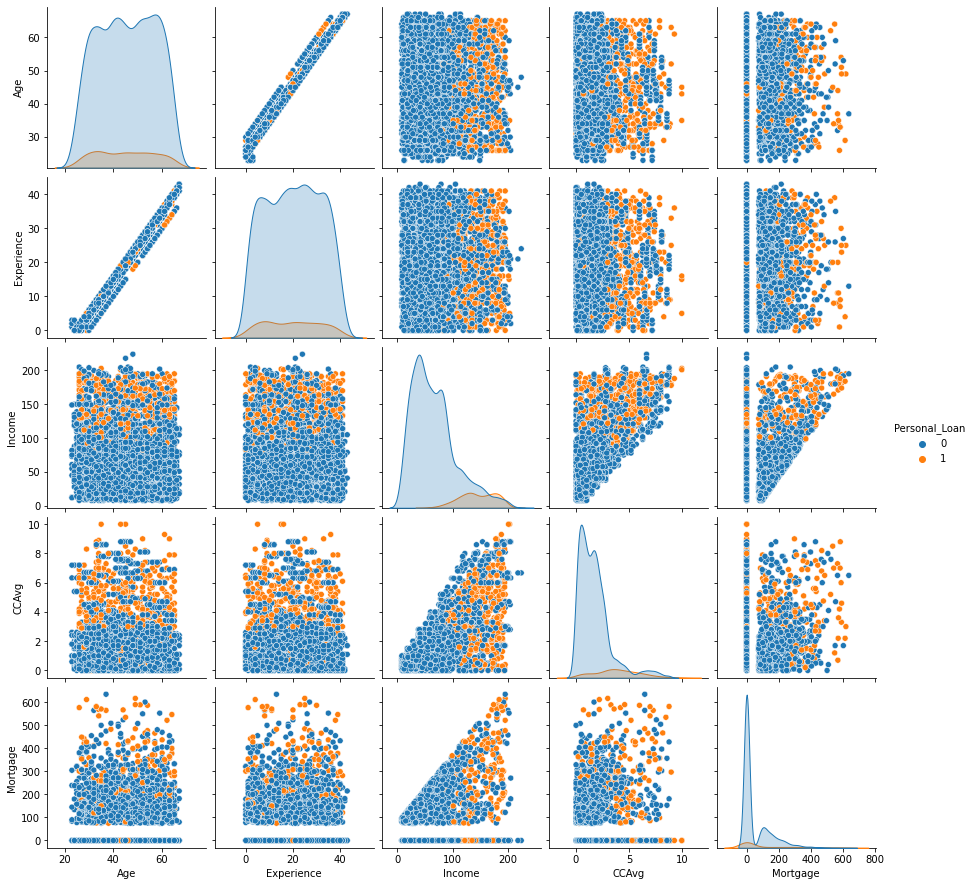

<IPython.core.display.Javascript object>

In [225]:
sns.pairplot(data, hue="Personal_Loan")
plt.show()

- Thereis a clear distinction in the distribution of variables for customers who accepted the personal loan and those who did not accept.
- Let's explore this further with the help of other plots.

In [226]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


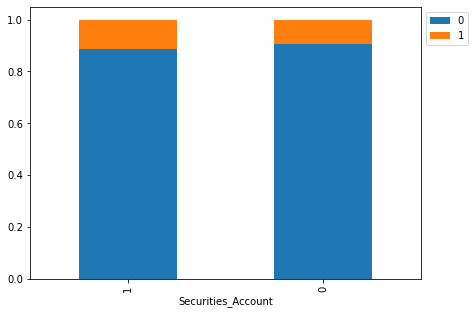

<IPython.core.display.Javascript object>

In [227]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* 87.5% of customers who accepted the personal loan offered in the last campaign don't have securities account with the bank whereas only 12.5% who accepted the loan have securities account.
* ~ 90% of customers who did not accept personal loan offered in the last campaign don't have securities account with the bank whereas approx 10% who refused the loan have securities account.

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


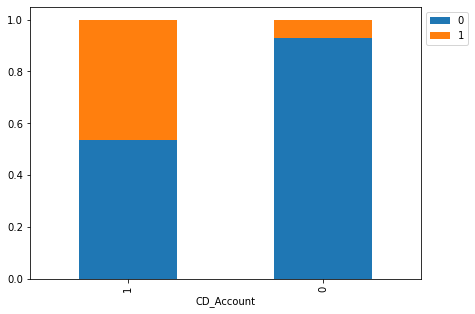

<IPython.core.display.Javascript object>

In [228]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* ~ 41% of customers who accepted the personal loan offered in the last campaign have certificate of deposit account with the bank, whereas approx 59% of those who accepted the loan offered don't have certificate of deposit account with the bank.
* Approx 96.4% of customers who did not accept the loan offered in the last campaign dont have certificate of deposit account with the bank, while ~ 5.6% of those who did refuse the loan have certificate of deposit account with the bank

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


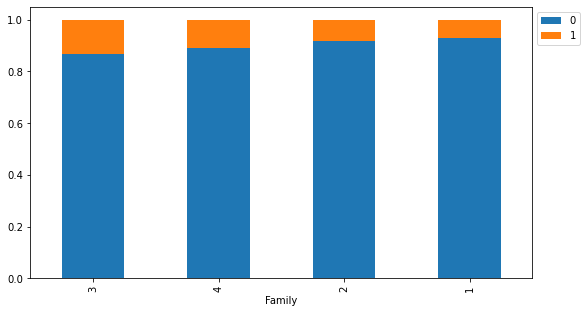

<IPython.core.display.Javascript object>

In [229]:
stacked_barplot(data, "Family", "Personal_Loan")

* Approx 56% of customers who accepted the personal loan offered have between 3 and 4 family members (28% of each) whereas, 44% of those who accepted the loan have between 1 and 2 family members (22% of each)
* Approx 24 % of customers who refusd the personal loan offered have 4 family members, ~ 19.4% have 3 members in their family, 30.2% have 1 person in the family and 26.4% have 2 femily members.

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


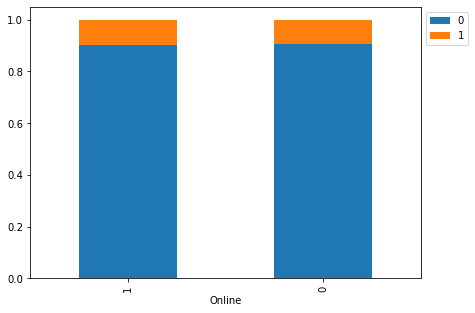

<IPython.core.display.Javascript object>

In [230]:
stacked_barplot(data, "Online", "Personal_Loan")

* ~ 60% of customers who accepted the personal loan offered by the bank use internet banking facilities, whereas ~40% of them don't use internet banking facilities.
* ~ 60% of customers who did not accept the personal loan offered by the bank use internet banking facilities, while approx 40% of them don't use internet banking facilities.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


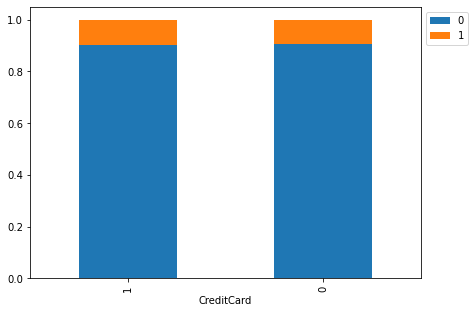

<IPython.core.display.Javascript object>

In [231]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* More than 70% of the customers who refused the loan offered by the bank don't use a credit card issued by any other bank. Only 30% of them use credit cards issued by other banks
* Similarly, more than 70% of the customers who accepted the loan offered by the bank don't use a credit card issued by any other bank, while 30% of them do use a credit card issued by any other bank

#### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


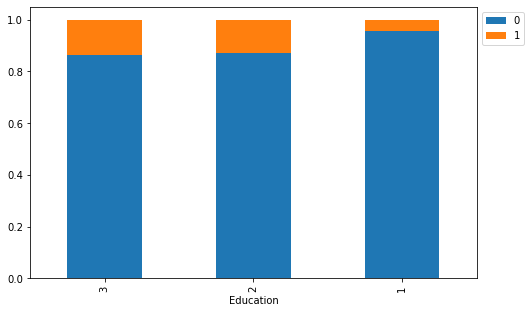

<IPython.core.display.Javascript object>

In [232]:
stacked_barplot(data, "Education", "Personal_Loan")

* Approx 43% of the customers who accepted the loan offered by the bank are Advanced/Professional. ~38% of the customers who accepted the loan are Graduate, whereas the rest, 19%, are undergraded
* ~29% of the customers who refused the loan are Advanced/Professional. Approx 27% of these customers are Graduate, while 44% of hose customers are undergraded

#### Personal_Loan vs Cities_choosen

Personal_Loan        0    1   All
Cities_choosen                   
All               4520  480  5000
Others            1406  149  1555
Los Angeles        337   38   375
Berkeley           214   27   241
San Diego          248   21   269
San Francisco      260   20   280
Palo Alto          114   16   130
Sacramento         142   15   157
La Jolla            97   15   112
Stanford           114   13   127
Santa Clara         65   12    77
San Jose            85   11    96
Pasadena            65   10    75
Santa Barbara       95    8   103
Irvine              50    8    58
Santa Cruz          44    7    51
Monterey            71    6    77
Davis              115    6   121
Los Altos           30    6    36
Oakland             50    5    55
San Luis Obispo     28    5    33
Santa Clarita       17    5    22
Huntington Beach    30    5    35
El Segundo          45    5    50
Moss Landing        22    4    26
Menlo Park          48    4    52
Hayward             37    4    41
Fallbrook     

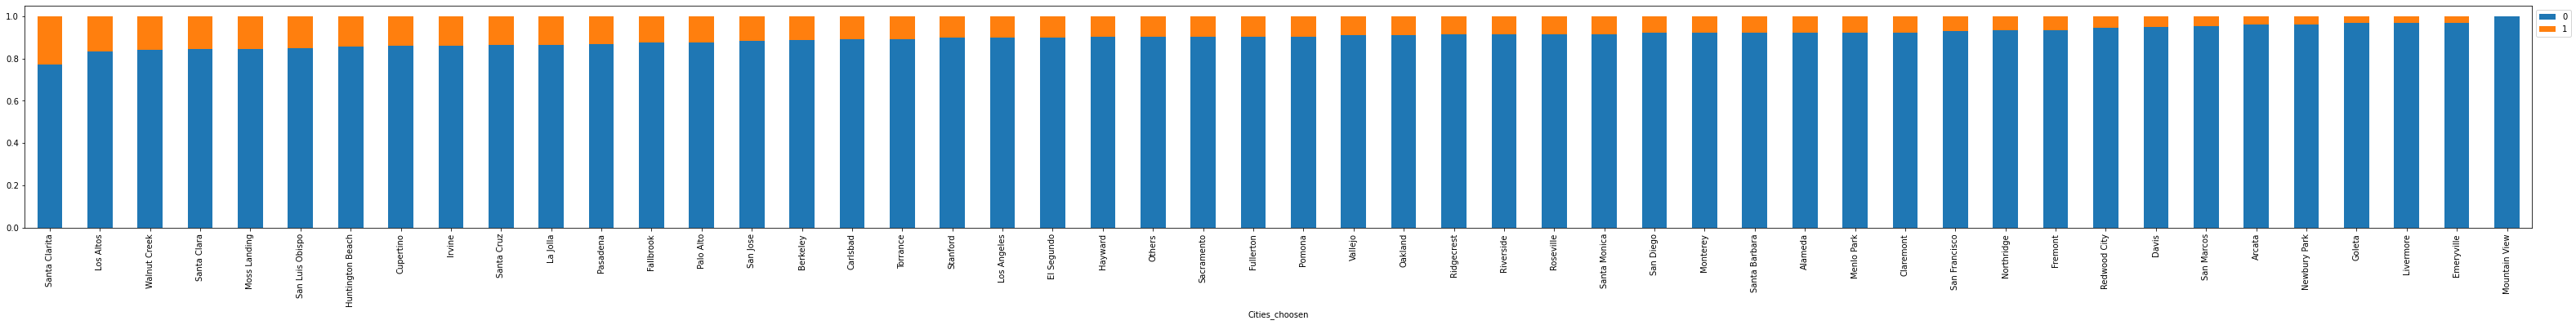

<IPython.core.display.Javascript object>

In [233]:
stacked_barplot(data, "Cities_choosen", "Personal_Loan")

* No one from Mountain View, Redlands and Mission Viejo accepted the loan offered by the bank.
* There are more cities in which less than 10 persons accpeted the loan.

#### Personal_Loan vs state

Personal_Loan     0    1   All
state                         
All            4520  480  5000
CA             4489  477  4966
Others           31    3    34
------------------------------------------------------------------------------------------------------------------------


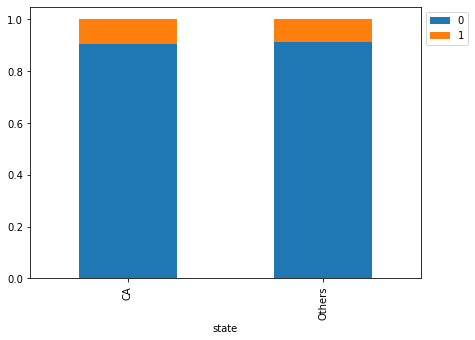

<IPython.core.display.Javascript object>

In [234]:
stacked_barplot(data, "state", "Personal_Loan")

* 99.3% of those who accepted the loan live in California. Only 3 persons who accepted live out of California
* 31 customers who refused the loan don't live in California and 99.3% of those customers live in California.

In [235]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### Personal_Loan vs Age

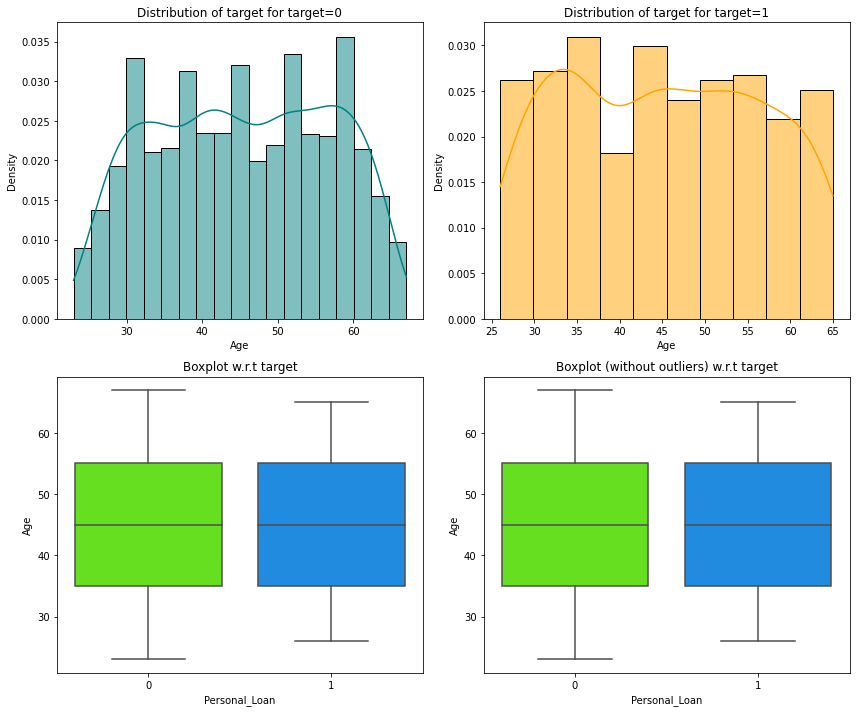

<IPython.core.display.Javascript object>

In [236]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* People who accepted or did not accepted the loan offererd by the bank have almost the same range of age.
* The average of age is the same in both sides
* This shows that every customer, whatever his age, is likely to accept or to not accept the loan.

#### Personal_Loan vs Experience

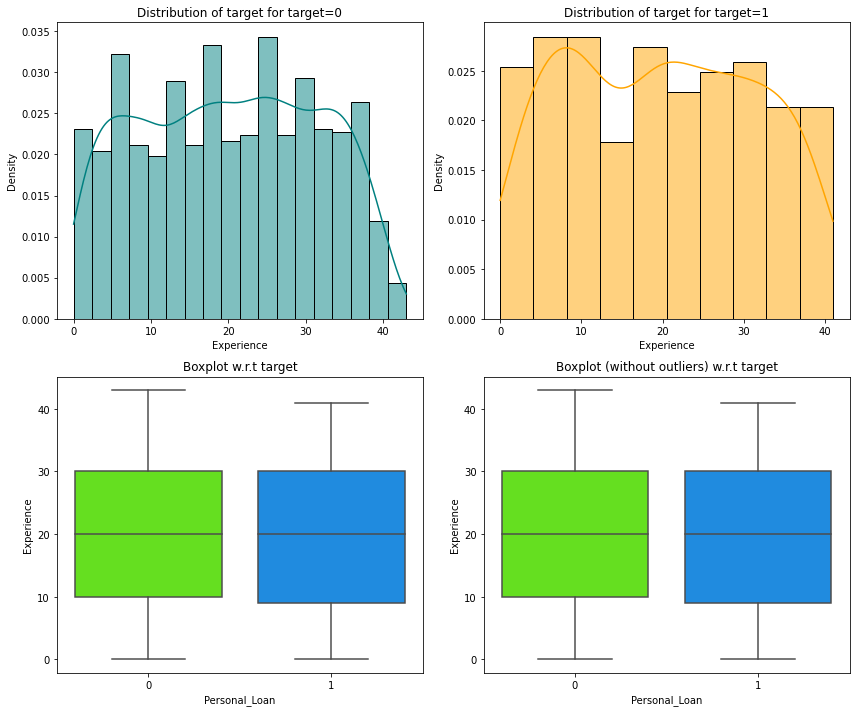

<IPython.core.display.Javascript object>

In [237]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* Majority of customers having accepted or refused the loan offered by the bank have around 30 years of professional experience.

#### Personal_Loan vs Income

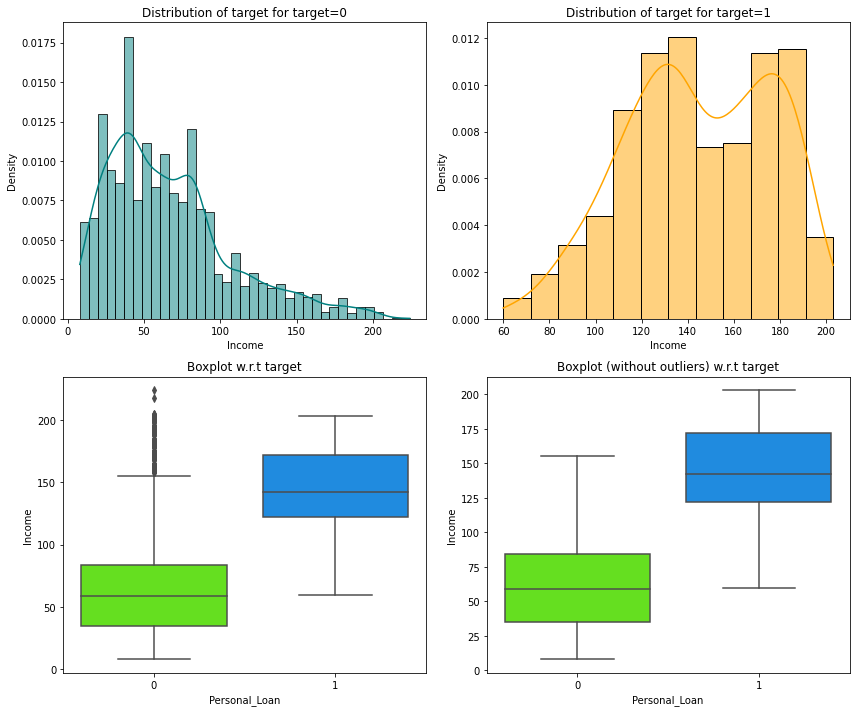

<IPython.core.display.Javascript object>

In [238]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* The customers that accepted the loan offered earn between 60K and more 200K dollars per year. Their average income is between 120K and 140K dollars per year.
* Those who did not accept the loan earn around 40K dollars per year. Tere are outliers present at the right of the boxplot.

#### Personal_Loan vs CCAvg

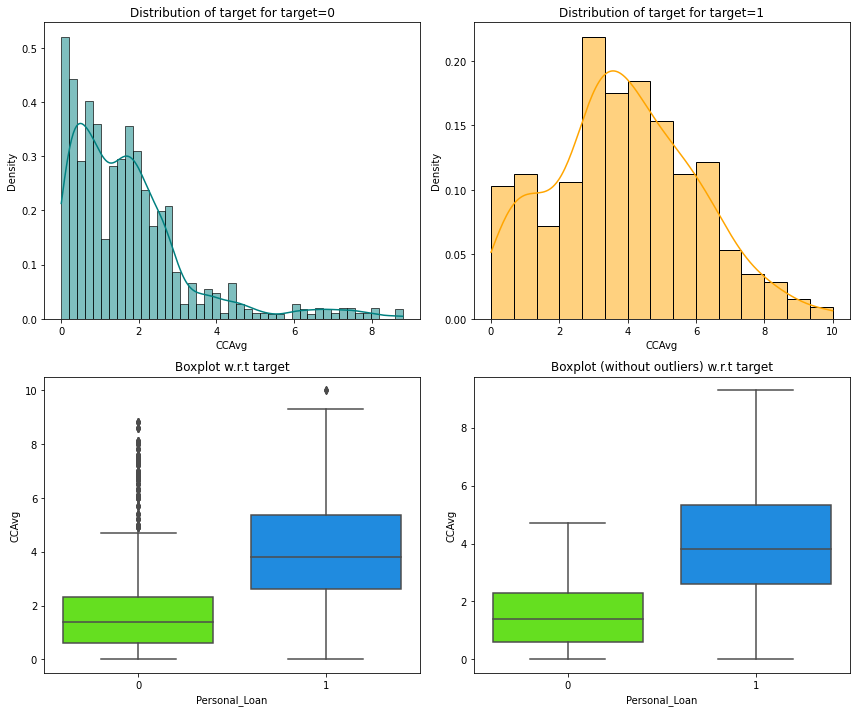

<IPython.core.display.Javascript object>

In [239]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Customers with a higher Average spending on credit cards per month are those who accepted the loan offered by the bank

#### Personal_Loan vs Mortgage

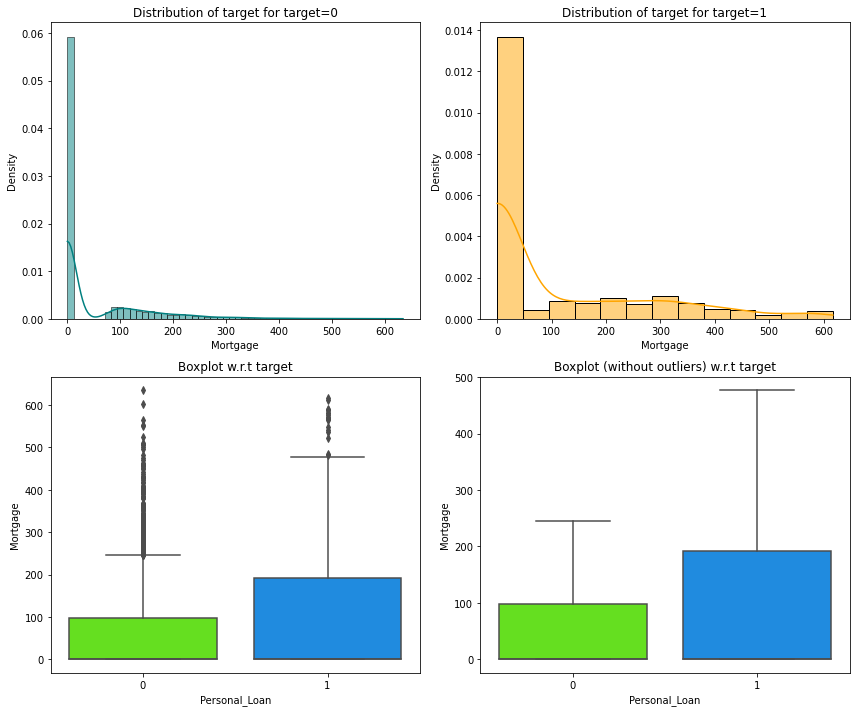

<IPython.core.display.Javascript object>

In [240]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* Majority of customers having accepted the loan proposed by the bank have the higher level of mortgage (around 200K dollars). There are some outliers
* Those having around ~100K dollars house mortgage had not accepted the loan offered by the bank. There are outliers present.

# Summary of EDA

**Data Description:**

*The dataset has 5000 columns and 14 columns*
* All the columns are infered to be numerical, even though `ID`, `ZIPCode`, `Education`, `Family`, `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online` and `CreditCard` which are categorical variables
* The columns mentionned above should be convert into categorical variables
* The column `ID` should be dropped. It doesn't provide any relevant information
*`Age`: Average age of customers in the dataset is 45.34 years. The variable `Age` has a wide range from 23 to 67 years old. It is almost normal distributed. The median age is 45 years old. This shows that the majority of customers are under 45.34 years of age
*`Experience`: The average of professional experience of customers in the dataset is approx 20.1 years but there is a wide range with values from -3 to 43. We will impute the 52 negative values of the column with their opposite. The column `Experience` looks normal distributed
*`Income`: The average of the annual income of the customers in the dataset is approx 73.8 thousands dollars. The variable is right skewed. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable. We will explore this further in univariate analysis
*`CCAvg`: There is a huge difference in the 75th percentile and the maximum value of the Average spending on credit cards per month, indicating the presence of outliers. The variable is right skewed with the Mean approx at 1.94 thousands dollars and the Median at 1.5 thousands dollars
*`Mortgage`: Value of house mortgage if any is right skewed as the Median is null and the Mean is approx 56.5 thousands dollars. A vast difference in 75th percentile and the maximum values, indicates that there might be outliers present in the variable.

* There are no missing values in the original dataset but after extracting information from the ZIPCode, there are missing values in the columns `City` and `state`.
* The number of missing values in the columns `City` and `states` are equal (That means that probably means that the missing values are on the same rows)
* Some Zipcode was not identified neither with a city nor with a state. But we kept them in the dataset. We'll repalce those missing information by the values "Others"
* The number of missing values in the columns `City` and `states` are equal (That means that probably means that the missing values are on the same rows)


* The most important Family size is 1.
* The top frequent level of education is level 1 (Undergrad).
* The most recurrent Personal_Loan is 0 (not accepted).
* The most repeated Securities_Account is 0 (the customer don't have securities account with the bank).
* The top constant CD_Account is 0 (the customer don't have a certificate of deposit (CD) account with the bank).
* The most important Online is 1 (the customers use internet banking facilities).
* The top constant CreditCard is 0 (the customer don't have a certificate of deposit (CD) account with the bank).
* The top frequent city is Los Angeles.
* The unique valid state extracted from the ZIPCode was CA. 



**Observations from EDA:**

- *Univariate Analysis* 

    - *Numeric variables:*
 * `Age` has no outliers. It is in fact, either right-skewed nor normal distributed but it has many peaks at around 35, 42, etc
 * `Experience` looks almost normal distributed. It has no outliers
 * `Income`: Most of the data is concentrated around 20 and 80 thousands dollars. This give a sense that, most of the observations in data might be customers earning around 20k and 80k dollars per year. The boxplot shows that there are outliers at the right end. We will not treat these outliers as they represent the real market trend
 * The distribution of the `CCAvg` amount of expenses on credit cards per month, is right-skewed. The boxplot shows that there are outliers at the right end. We will not treat these outliers as they represent the real market trend
 * `Mortgage`: Most of the data is concentrated around 0 dollar. Which gives sens that the most observations in data might be customers that they seem to be customers whom the bank trusts or customers on whom the bank has already ensured the risk of bankruptcy. Some of the observations are clear outliers that we will not treat these outliers as they represent the real market trend.

   - *Categorical variable:*
 * `Personal Loan`: ~9% of the observations are customers who accepted the personal loan offered in the last campaign. So, **1** ====> **Success**. ~91% did not accept. **0** ====> **Not success**. The class distribution in the target variable is imbalanced
 * `Securities_Account`: In addition to a fiduciary deposit, approx 10.4% of customers have securities account. **1** ======> **Yes**. Approx 90.6% of customers don't have securities account.**0** ======> **No**
 
 * `CD_Account`: Approx approx 94% of customers don't have a certificate of deposit account with the bank. **0** ======> **No**. While approx 6% have certificate of deposit account with the bank. **1** ======> **Yes**
 
 * `Online`: Approx 40%.3 of customers don't use internet banking facilities. **0** ======> **No**. Approx 60% of customers use internet banking facilities. **1** ======> **Yes**
 * `CreditCard`: Approx approx 30% of customers don't use a credit card issued by any other Bank. **1** ======> **No**. Approx 70% of customers use a credit card issued by any other Bank. **0** ======> **Yes**

- ***Except the Personal_Loan variable that classes were indicated in the problem statement, we had to infer the classes of the other variables that showed classes. 0 for No and 1 for Yes***

 * `Family`: ~30% of the observations are customers with 1 member family. ~26% of the observations are customers with 2 members family. ~25% of the observations are customers with 4 members family. ~20% of the observations are customers with 3 members family.
 * `Education`: Approx 42% of customers of the bank are Undergrad. Approx 28% are Graduate. And approx 30% of them are Advanced/Professional. So, 58% of customers of the bank are at least Graduate.
 * `Cities_choosen`: Los Angeles is the most common city name, followed by San Francisco, San Diego and Berkeley
 * `state`: 99.3% of States represented correspond to CA. Almost all the customers of the bank live in California
 
 
 
- *Bivariate Analysis*

- *Numeric and target variables*
 * There is significant correlation between some columns:
    - *`Age` and `Experience` with a high correlation at 0.99. We will drop one of the caolumn*
    - *`Income` and `CCAvg` with an important correlation at 0.65*
 * Thereis a clear distinction in the distribution of variables for customers who accepted the personal loan and those who did not accept.
 
 * `Age` and `Personal_Loan`:  People who accepted or did not accepted the loan offererd by the bank have almost the same range of age. The average of age is the same in both sides. This shows that every customer, whatever his age, is likely to accept or to not accept the loan.
 * `Experience` and `Personal_Loan`: Majority of customers having accepted or refused the loan offered by the bank have around 30 years of professional experience.
 * `Income` and `Personal_Loan`: * The customers that accepted the loan offered earn between 60K and more 200K dollars per year. Their average income is between 120K and 140K dollars per year. Those who did not accept the loan earn around 40K dollars per year in average. Tere are outliers present at the right of the boxplot.
 * `CCAvg` and `Personal_Loan`: Customers with a higher Average spending on credit cards per month are those who accepted the loan offered by the bank
 * `CCAvg` and `Personal_Loan`: Majority of customers having accepted the loan proposed by the bank have the higher level of mortgage (around 200K dollars). There are some outliers
Those having around ~100K dollars house mortgage had not accepted the loan offered by the bank. There are outliers present.
  
  
- *Categorical and target variables*  
 * `Securities_Account` and `Personal_Loan` : 87.5% of customers who accepted the personal loan offered in the last campaign don't have securities account with the bank whereas only 12.5% who accepted the loan have securities account. ~ 90% of customers who did not accept personal loan offered in the last campaign don't have securities account with the bank whereas approx 10% who refused the loan have securities account. There is no correlation between having securities account and accepting the loan.
 
 
 * `CD_Account` and `Personal_Loan`: ~ 41% of customers who accepted the personal loan offered in the last campaign have certificate of deposit account with the bank, whereas approx 59% of those who accepted the loan offered don't have certificate of deposit account with the bank. Approx 96.4% of customers who did not accept the loan offered in the last campaign don't have certificate of deposit account with the bank, while ~ 5.6% of those who did refuse the loan have certificate of deposit account with the bank 
 
 
 * `Family` and `Personal_Loan`: Approx 56% of customers who accepted the personal loan offered have between 3 and 4 family members (28% of each) whereas, 44% of those who accepted the loan have between 1 and 2 family members (22% of each). Approx 24 % of customers who refusd the personal loan offered have 4 family members, ~ 19.4% have 3 members in their family, 30.2% have 1 person in the family and 26.4% have 2 femily members.
 
 
 * `Online` and `Personal_Loan`: ~ 60% of customers who accepted the personal loan offered by the bank use internet banking facilities, whereas ~40% of them don't use internet banking facilities. ~ 60% of customers who did not accept the personal loan offered by the bank use internet banking facilities, while approx 40% of them don't use internet banking facilities.
 
 
 * `CreditCard` and `Personal_Loan`: More than 70% of the customers who refused the loan offered by the bank don't use a credit card issued by any other bank. Only 30% of them use credit cards issued by other banks. Similarly, more than 70% of the customers who accepted the loan offered by the bank don't use a credit card issued by any other bank, while 30% of them do use a credit card issued by any other bank 


* `Education` and `Personal_Loan`: Approx 43% of the customers who accepted the loan offered by the bank are Advanced/Professional. ~38% of the customers who accepted the loan are Graduate, whereas the rest, 19%, are undergraded. ~29% of the customers who refused the loan are Advanced/Professional. Approx 27% of these customers are Graduate, while 44% of hose customers are undergraded
* `Cities_choosen` and `Personal_Loan`: No one from the cities Mountain View, Redlands and Mission Viejo accepted the loan offered by the bank. There are more cities in which less than 10 persons accpeted the loan.
* `state` and `Personal_Loan`: 99.3% of those who accepted the loan live in California. Only 3 persons who accepted live out of California. 31 customers who refused the loan don't live in California and 99.3% of those customers live in California.

# Data preparation

**Remind**

* `Personal Loan`: **1** = **Success**. **0** = **Not success**. 
* `Securities_Account`: **0** = **No**. **1** = **Yes**
* `CD_Account`: **0** = **No**. **1** = **Yes**
* `Online`: **0** = **No**. **1** = **Yes**
* `CreditCard`: **0** = **No**. **1** = **Yes**

### Dropping the column `Experience` as it is highly correlated with `Age` 

When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly. The model results will be unstable and vary a lot given a small change in the data or model

In [241]:
# renaming column
data = data.rename(columns=({"Cities_choosen": "city"}))
# information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  state               5000 non-null   object  
 13  city                5000 non-null   object  
dtypes: category(7), float64(1), int64(4), object(2)
memory usage: 308.7+ KB


<IPython.core.display.Javascript object>

In [242]:
# Convert the columns 'state" and 'city' from object to category

cat_vars = ["state", "city"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  state               5000 non-null   category
 13  city                5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 242.9 KB


<IPython.core.display.Javascript object>

In [243]:
# Making a copy of the dataset
df = data.copy()

<IPython.core.display.Javascript object>

In [244]:
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [245]:
print("The shape of the Training set is : ", X_train.shape)
print("The shape of the test set is: ", X_test.shape)
print("The Percentage of classes in training set is:")
print(y_train.value_counts(normalize=True))
print("The Percentage of classes in test set is:")
print(y_test.value_counts(normalize=True))

The shape of the Training set is :  (3500, 63)
The shape of the test set is:  (1500, 63)
The Percentage of classes in training set is:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
The Percentage of classes in test set is:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

# Building the model

## Model evaluation criterion

## Model can make wrong predictions as:
1. Predicting a liability customer will not purchase the loan but in reality he did.
2. Predicting a liability customer will purchase the loan but in reality he did not.

### Which case is more important? 
* The following case is the most important:

* If we predict a customer is going to not purchase the loan and in the reality he did. The risk of the bank of not converting its liability customers to personal loan customers will be high.
* So, our predictions should be as closed as possible to the last year campaign observations 


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

# 1. Logistic Regression

In [246]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [247]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Logistic Regression

In [248]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
# we can pass a dictionary {0:0.1,1:0.9} to the model to specify the weight of each class and the decision tree will give more weightage to class 1

lg = LogisticRegression(
    solver="newton-cg", class_weight={0: 0.1, 1: 0.9}, random_state=1
)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

## Finding  coefficients

In [249]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,state_Others,city_Arcata,city_Berkeley,city_Carlsbad,city_Claremont,city_Cupertino,city_Davis,city_El Segundo,city_Emeryville,city_Fallbrook,city_Fremont,city_Fullerton,city_Goleta,city_Hayward,city_Huntington Beach,city_Irvine,city_La Jolla,city_Livermore,city_Los Altos,city_Los Angeles,city_Menlo Park,city_Monterey,city_Moss Landing,city_Mountain View,city_Newbury Park,city_Northridge,city_Oakland,city_Others,city_Palo Alto,city_Pasadena,city_Pomona,city_Redwood City,city_Ridgecrest,city_Riverside,city_Roseville,city_Sacramento,city_San Diego,city_San Francisco,city_San Jose,city_San Luis Obispo,city_San Marcos,city_Santa Barbara,city_Santa Clara,city_Santa Clarita,city_Santa Cruz,city_Santa Monica,city_Stanford,city_Torrance,city_Vallejo,city_Walnut Creek,Intercept
Coefficients,0.005512,0.050299,0.291369,0.000702,-0.125762,1.416671,1.029254,2.092116,2.200281,-0.620376,2.418227,-0.400889,-0.600998,0.127591,-0.179902,0.251262,-0.260873,0.0144,-0.120906,-0.465798,-0.003645,-0.253499,-0.158817,0.026581,-0.064687,-0.147955,0.192758,0.043056,0.396984,-0.057105,-0.446071,-0.064145,0.133305,-0.306845,-0.335731,0.345451,-0.136245,-0.303483,-0.186593,-0.246129,-0.04014,-0.050754,0.330601,-0.042255,-0.245713,0.263829,0.579804,0.152916,0.432235,0.28003,0.145161,0.050601,-0.202249,-0.040553,0.27004,-0.356137,0.056904,0.015203,0.124864,0.446447,0.298591,0.109172,-0.148066,-8.509447


<IPython.core.display.Javascript object>

## Coefficient interpretations

* Coefficient of Age,Income,CCAvg,Mortgage,Education level, CD_Accounts, state and some famlily sizes and cities are positive impact on purchasing the loan. That means that an increase in these will lead to increase in chances of a customer of purchasing the loan. 
* Coefficient of Online, Securities_Account, CreditCard, some famlily size and cities are negative. An increase in these will lead to decrease in chances of a customer of having the loan.

##  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [250]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,state_Others,city_Arcata,city_Berkeley,city_Carlsbad,city_Claremont,city_Cupertino,city_Davis,city_El Segundo,city_Emeryville,city_Fallbrook,city_Fremont,city_Fullerton,city_Goleta,city_Hayward,city_Huntington Beach,city_Irvine,city_La Jolla,city_Livermore,city_Los Altos,city_Los Angeles,city_Menlo Park,city_Monterey,city_Moss Landing,city_Mountain View,city_Newbury Park,city_Northridge,city_Oakland,city_Others,city_Palo Alto,city_Pasadena,city_Pomona,city_Redwood City,city_Ridgecrest,city_Riverside,city_Roseville,city_Sacramento,city_San Diego,city_San Francisco,city_San Jose,city_San Luis Obispo,city_San Marcos,city_Santa Barbara,city_Santa Clara,city_Santa Clarita,city_Santa Cruz,city_Santa Monica,city_Stanford,city_Torrance,city_Vallejo,city_Walnut Creek
Odds,1.005527,1.051585,1.338258,1.000702,0.881824,4.12337,2.798977,8.102040,9.027550,0.537742,11.225939,0.669724,0.548264,1.136088,0.835352,1.285646,0.770379,1.014504,0.886118,0.627634,0.996362,0.776081,0.853153,1.026938,0.937361,0.862470,1.212589,1.043996,1.487332,0.944495,0.640138,0.937869,1.142599,0.735764,0.714816,1.412626,0.872629,0.738242,0.829782,0.781821,0.960655,0.950512,1.391804,0.958626,0.782147,1.301905,1.785688,1.165227,1.540698,1.323170,1.156226,1.051903,0.816892,0.960258,1.310017,0.700377,1.058554,1.015319,1.132995,1.562750,1.347959,1.115354,0.862374
Change_odd%,0.552687,5.158504,33.825793,0.070233,-11.817552,312.33701,179.897746,710.204003,802.754968,-46.225783,1022.593883,-33.027558,-45.173591,13.608818,-16.464784,28.564641,-22.962125,1.450396,-11.388237,-37.236565,-0.363800,-22.391936,-14.684715,2.693762,-6.263873,-13.752976,21.258898,4.399640,48.733226,-5.550487,-35.986163,-6.213066,14.259885,-26.423571,-28.518449,41.262641,-12.737133,-26.175783,-17.021846,-21.817896,-3.934465,-4.948790,39.180439,-4.137438,-21.785324,30.190496,78.568836,16.522665,54.069763,32.316958,15.622605,5.190340,-18.310839,-3.974196,31.001684,-29.962320,5.855422,1.531926,13.299476,56.275007,34.795873,11.535434,-13.762601


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Age`: our model suggests that Age does in fact influence on purchasing the loan. And because it is a positive number, we can say that Age increases the probability of buying the laon. 
* The group of borrowers has a 1.005 times the odds of the non-borrowers group of having the loan. In other words, the borrowers group has 0.5% (1.005 - 1 = 0.005) more odds of accepting the loan offered than non-borrowers group.
* Holding all other features constant, a 1 unit change in Age will increase the odds of a customer that accept the loan offered by 0.005 times or a ~ 0.55% increase odds of accepting loans.
 - *`Interpretation for other positive attributes can be done similarly.`*

* `Securities_Account`: our model suggests that Securities Account do influence on purchasing the loan. And because it is a negative number, we can say that Securities Account decrease the probability of accepting the laon offered.
* Having securities account is associated with 46% (1-0.54) of purchasing the loan. The group of non-borrowers has a 0.46 times the odds of the borrowers group of having the loan. In other words, the non-borrowers group has 54% (1 - 0.46 = 0.54) more odds of not accepting the loan offered than non-borrowers group.

* Holding all other features constant, a 1 unit change in Securities Account will increase the odds of a customer that not accept the loan offered by 0.54 times.
 - *`Interpretation for other negative attributes can be done similarly.`*


### Checking model performance on training set

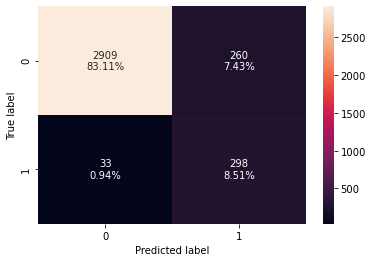

<IPython.core.display.Javascript object>

In [251]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

**Interpretation:**

 - *[True label(0), Predicted label(0)] ==> True Negative (TN) ==> Predicting a customer will not purchase the loan AND in the reality he refused the loan*
 - *[True label(0), Predicted label(1)] ==> False Positive (FP) ==> Predicting a customer will purchase the loan BUT in the reality he refused the loan)*
 - *[True label(1), Predicted label(0)] ==> False Negative (FN) ==> Predicting a customer will refuse the loan BUT in the reality he purchased the loan*
 - *[True label(1), Predicted label(1)] ==> True Positive (TP) ==> Predicting a customer will accept the loan AND in the reality he purchased the loan*

### **FP is the most risky scenario for the bank. So,  `Recall` should be maximized**

In [252]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)


print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.916286,0.900302,0.53405,0.670416


<IPython.core.display.Javascript object>

### Checking performance on test set

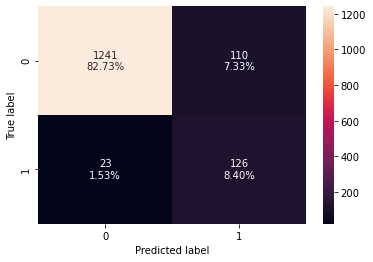

<IPython.core.display.Javascript object>

In [253]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [254]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.911333,0.845638,0.533898,0.654545


<IPython.core.display.Javascript object>

* Recall is high, both on training and test sets. The F1_score is not too bad.

### ROC-AUC

* ROC-AUC on training set

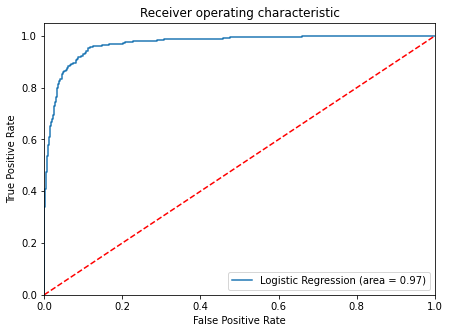

<IPython.core.display.Javascript object>

In [255]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

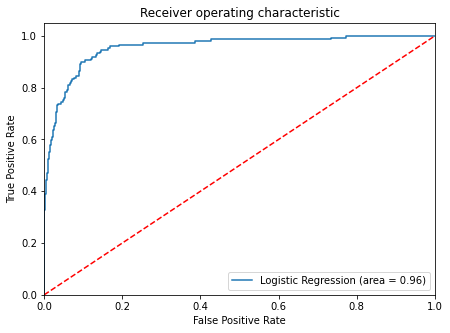

<IPython.core.display.Javascript object>

In [256]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

## Model Performance Improvement

* Let's see if the Recall can be improved further, by changing the model threshold using AUC-ROC Curve.

## Optimal threshold using AUC-ROC curve

In [257]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37974658438892567


<IPython.core.display.Javascript object>

* We will consider a threshold at 0.38. 

### Checking model performance on training set

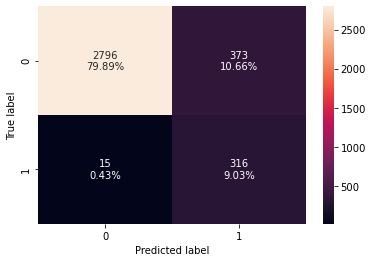

<IPython.core.display.Javascript object>

In [258]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [259]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.889143,0.954683,0.458636,0.619608


<IPython.core.display.Javascript object>

### Checking model performance on test set

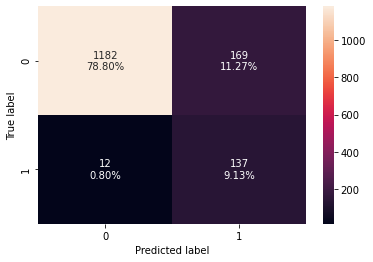

<IPython.core.display.Javascript object>

In [260]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [261]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.879333,0.919463,0.447712,0.602198


<IPython.core.display.Javascript object>

* The Recall of the model for both training and test sets has increased a little bite. F1 has reduced consistantly
* Changing the model threshold using AUC-ROC Curve have improve the Recall but reduced the F1 score

### Let's use Precision-Recall curve and see if we can find a better threshold

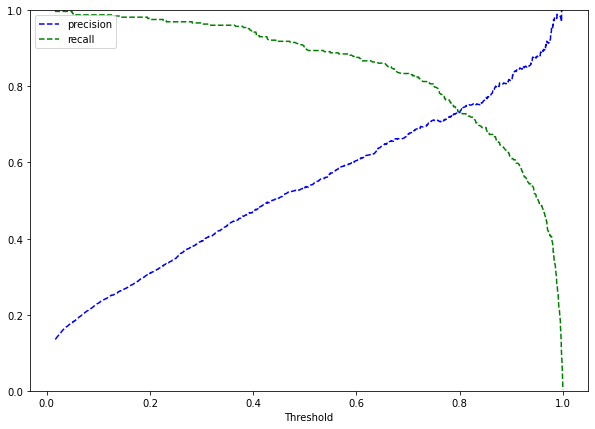

<IPython.core.display.Javascript object>

In [262]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.8, we get balanced recall and precision.

In [263]:
# setting the threshold
optimal_threshold_curve = 0.81

<IPython.core.display.Javascript object>

### Checking model performance on training set

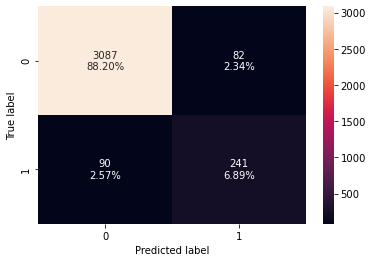

<IPython.core.display.Javascript object>

In [264]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [265]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.950857,0.728097,0.74613,0.737003


<IPython.core.display.Javascript object>

### Checking model performance on test set

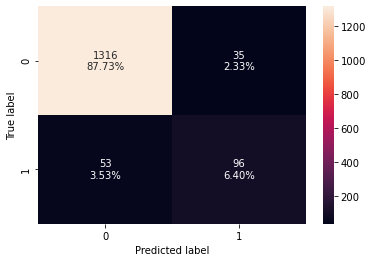

<IPython.core.display.Javascript object>

In [266]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [267]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.941333,0.644295,0.732824,0.685714


<IPython.core.display.Javascript object>

* Accuracy, Precision and f1_score of both training and test sets have increased. Recall has decreased but is not too bad
* Model is performing well on both training and test data

## Model Performance Summary

In [268]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.81 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.38 Threshold,Logistic Regression-0.81 Threshold
Accuracy,0.916286,0.889143,0.950857
Recall,0.900302,0.954683,0.728097
Precision,0.534050,0.458636,0.746130
F1,0.670416,0.619608,0.737003


<IPython.core.display.Javascript object>

In [269]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.81 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.38 Threshold,Logistic Regression-0.81 Threshold
Accuracy,0.911333,0.879333,0.941333
Recall,0.845638,0.919463,0.644295
Precision,0.533898,0.447712,0.732824
F1,0.654545,0.602198,0.685714


<IPython.core.display.Javascript object>

## Conclusion of logistic regression

* We have a better f1_score after model tuning with Logistic Regression-0.81 Threshold? at ~ 0.74 for train set and 0.68 for test set. 
* With the Logistic Regression at the threshold .38, the f1_score decrease to .62 and 0.60 both for train and test sets. It has the best recall.
* The first model Logistic Regression sklearn has a f1_score at 0.67 for train set and 0.65 for test sets.
* The model that performs well on reducing False Positive scenario is the model obtained after tuning : Logistic Regression-0.81 Threshold

- We have been able to build a predictive model that can be used by the bank to help the marketing department to identify the potential customers who have a higher probability of purchasing the loan. 
* Coefficient of Age, Income, CCAvg, Mortgage, Education, CD_Account, some famlily sizes and cities are positive factors on loan purchasing. That means that an increase in these will lead to increase in chances of a customer of buying the loan. 
* Coefficient of Online, Securities_Account, CreditCard, some famlily size and cities, are negative. An increase in these will lead to decrease in chances of a customer of having the loan.

In [270]:
coef_df.T

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,state_Others,city_Arcata,city_Berkeley,city_Carlsbad,city_Claremont,city_Cupertino,city_Davis,city_El Segundo,city_Emeryville,city_Fallbrook,city_Fremont,city_Fullerton,city_Goleta,city_Hayward,city_Huntington Beach,city_Irvine,city_La Jolla,city_Livermore,city_Los Altos,city_Los Angeles,city_Menlo Park,city_Monterey,city_Moss Landing,city_Mountain View,city_Newbury Park,city_Northridge,city_Oakland,city_Others,city_Palo Alto,city_Pasadena,city_Pomona,city_Redwood City,city_Ridgecrest,city_Riverside,city_Roseville,city_Sacramento,city_San Diego,city_San Francisco,city_San Jose,city_San Luis Obispo,city_San Marcos,city_Santa Barbara,city_Santa Clara,city_Santa Clarita,city_Santa Cruz,city_Santa Monica,city_Stanford,city_Torrance,city_Vallejo,city_Walnut Creek,Intercept
Coefficients,0.005512,0.050299,0.291369,0.000702,-0.125762,1.416671,1.029254,2.092116,2.200281,-0.620376,2.418227,-0.400889,-0.600998,0.127591,-0.179902,0.251262,-0.260873,0.0144,-0.120906,-0.465798,-0.003645,-0.253499,-0.158817,0.026581,-0.064687,-0.147955,0.192758,0.043056,0.396984,-0.057105,-0.446071,-0.064145,0.133305,-0.306845,-0.335731,0.345451,-0.136245,-0.303483,-0.186593,-0.246129,-0.04014,-0.050754,0.330601,-0.042255,-0.245713,0.263829,0.579804,0.152916,0.432235,0.28003,0.145161,0.050601,-0.202249,-0.040553,0.27004,-0.356137,0.056904,0.015203,0.124864,0.446447,0.298591,0.109172,-0.148066,-8.509447


<IPython.core.display.Javascript object>

## Recommendations based on logistic regression

* The bank should stop proposing the customers to subscribe Securities_Account, as we say in our analysis that customers who have Securities Account are more likely to not accepting the loans.
* Level of education and CD_Account are among the significant predictors of purchasing the loan. Bank should target customers who are educated and who owned a CD_Account.
* Customers wo have more than 2 family members are more likely to purchase a loan.
* The bank should target cities with customers earning an annual income around 120K dollars

# 2. Decision Tree

In [271]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

<IPython.core.display.Javascript object>

In [272]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [273]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Splitting data

In [274]:
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [275]:
print("The shape of the Training set is : ", X_train.shape)
print("The shape of the test set is: ", X_test.shape)
print("The Percentage of classes in training set is:")
print(y_train.value_counts(normalize=True))
print("The Percentage of classes in test set is:")
print(y_test.value_counts(normalize=True))

The shape of the Training set is :  (3500, 63)
The shape of the test set is:  (1500, 63)
The Percentage of classes in training set is:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
The Percentage of classes in test set is:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* As the frequency of class 0 is 91% and the frequency of class 1 is 9%, then class 0 is the dominant class and the decision tree will become biased toward the dominant classe.

* To avoid this case, we can pass a dictionary {0:0.1,1:0.90} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [276]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.1, 1: 0.9}, random_state=1
)

<IPython.core.display.Javascript object>

In [277]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

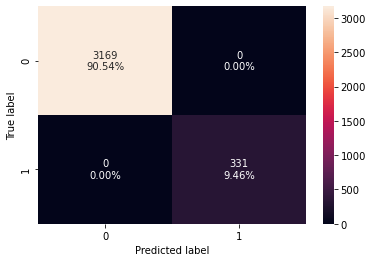

<IPython.core.display.Javascript object>

In [278]:
confusion_matrix_sklearn(model, X_train, y_train)

In [279]:
# Accuracy on the train test
print("Accuracy on training set : ", model.score(X_train, y_train))
print()
# Recall on the the train set
decision_tree_perf_train = get_recall_score(model, X_train, y_train)
print("Recall Score:", decision_tree_perf_train)

Accuracy on training set :  1.0

Recall Score: 1.0


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

### Checking model performance on test set

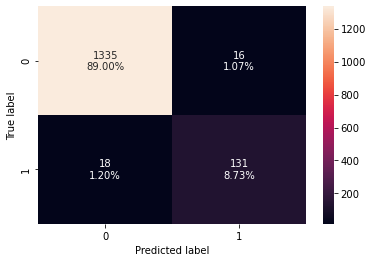

<IPython.core.display.Javascript object>

In [280]:
confusion_matrix_sklearn(model, X_test, y_test)

In [281]:
# Accuracy on the train test
print("Accuracy on testing set : ", model.score(X_test, y_test))
print()
# Recall on the test set
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Accuracy on testing set :  0.9773333333333334

Recall Score: 0.8791946308724832


<IPython.core.display.Javascript object>

* There is not a huge disparity in performance of model on training set and test set, which suggests that the model is not overfiiting that much.

## Visualizing the Decision Tree

In [282]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

In [283]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'state_Others', 'city_Arcata', 'city_Berkeley', 'city_Carlsbad', 'city_Claremont', 'city_Cupertino', 'city_Davis', 'city_El Segundo', 'city_Emeryville', 'city_Fallbrook', 'city_Fremont', 'city_Fullerton', 'city_Goleta', 'city_Hayward', 'city_Huntington Beach', 'city_Irvine', 'city_La Jolla', 'city_Livermore', 'city_Los Altos', 'city_Los Angeles', 'city_Menlo Park', 'city_Monterey', 'city_Moss Landing', 'city_Mountain View', 'city_Newbury Park', 'city_Northridge', 'city_Oakland', 'city_Others', 'city_Palo Alto', 'city_Pasadena', 'city_Pomona', 'city_Redwood City', 'city_Ridgecrest', 'city_Riverside', 'city_Roseville', 'city_Sacramento', 'city_San Diego', 'city_San Francisco', 'city_San Jose', 'city_San Luis Obispo', 'city_San Marcos', 'city_Santa Barbara', 'city_Santa Clara', 'city_Santa Clarita', 'city_Santa Cruz', 

<IPython.core.display.Javascript object>

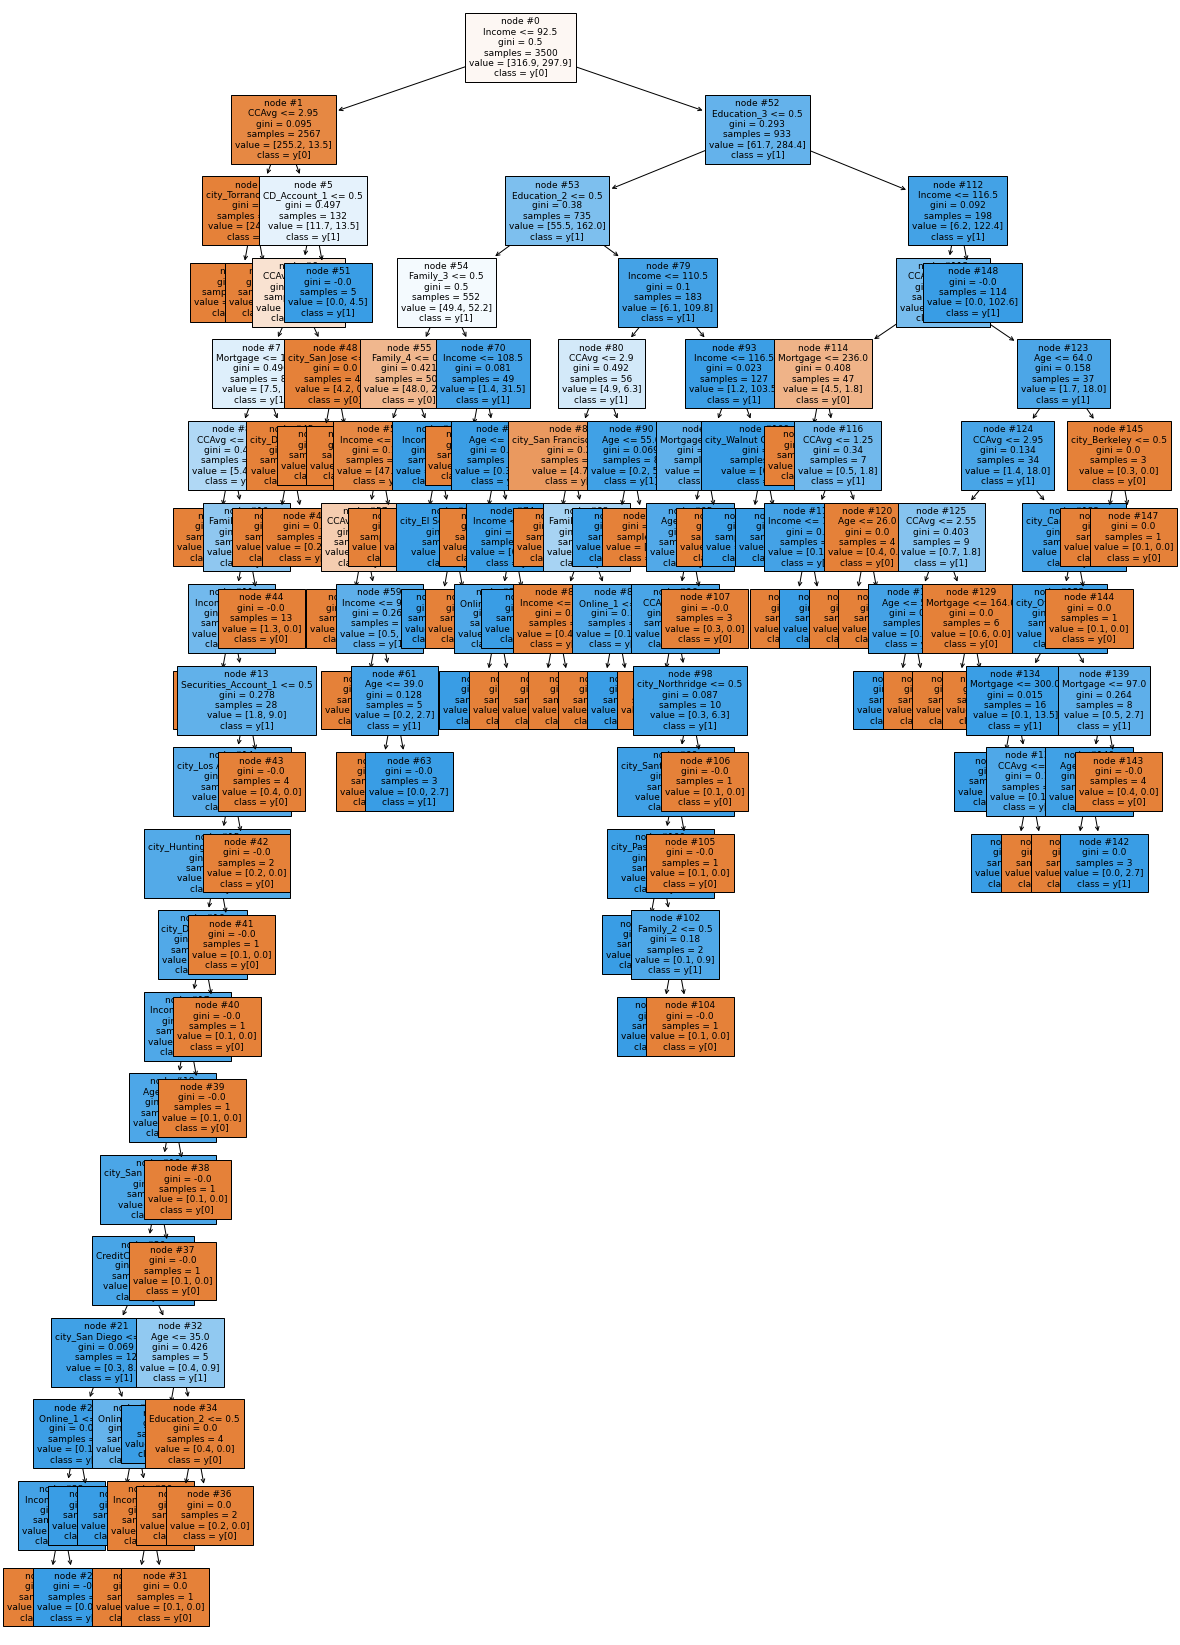

<IPython.core.display.Javascript object>

In [284]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [285]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- city_Torrance <= 0.50
|   |   |   |--- weights: [241.80, 0.00] class: 0
|   |   |--- city_Torrance >  0.50
|   |   |   |--- weights: [1.70, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- city_Los Angeles <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- city_Huntington Beach <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   | 

<IPython.core.display.Javascript object>

* The tree above is a little bite complex and a little painful to interpret.

In [286]:
# importance of features in the tree building (The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                Imp
Income                 6.269996e-01
CCAvg                  9.284629e-02
Family_4               8.234640e-02
Education_2            6.628501e-02
Family_3               6.237187e-02
Education_3            2.254324e-02
Mortgage               1.460843e-02
Age                    9.964145e-03
CD_Account_1           7.690498e-03
Online_1               2.849368e-03
city_San Francisco     2.825917e-03
Securities_Account_1   1.878577e-03
city_Los Angeles       9.945408e-04
city_El Segundo        6.476421e-04
city_Santa Clara       6.213394e-04
city_Northridge        6.025109e-04
city_Carlsbad          6.019704e-04
Family_2               5.861161e-04
city_San Marcos        5.549174e-04
CreditCard_1           5.423250e-04
city_Davis             5.222816e-04
city_Huntington Beach  5.120408e-04
city_Others            3.740184e-04
city_San Diego         1.759599e-04
city_Pasadena          5.494838e-05
city_Torrance          1.628516e-14
city_San Jose          4.843

<IPython.core.display.Javascript object>

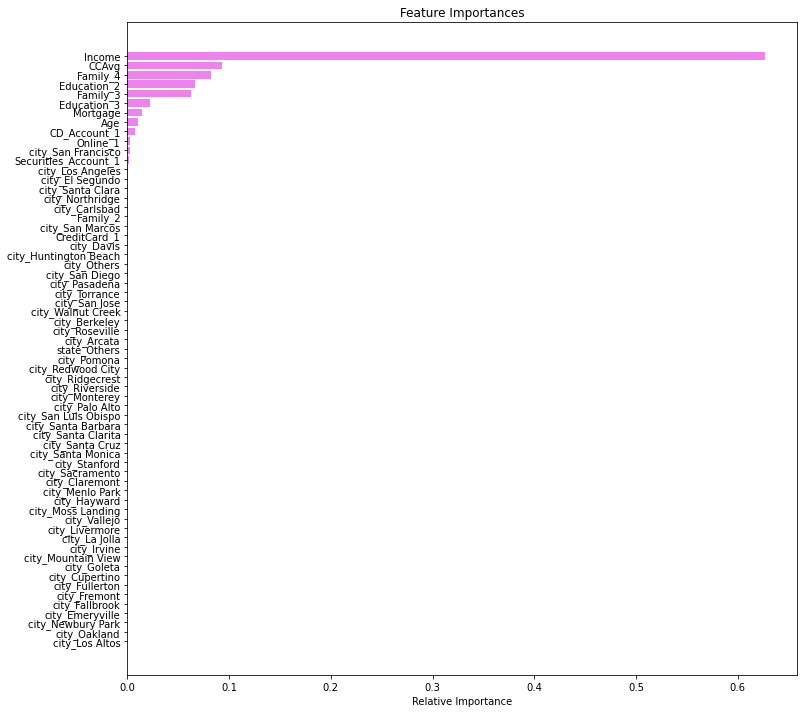

<IPython.core.display.Javascript object>

In [287]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the purchasing of loan.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of the model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [288]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

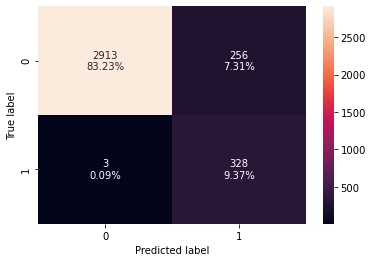

<IPython.core.display.Javascript object>

In [289]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [290]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print()
# Recall on train set
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Accuracy on training set :  0.926

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

### Checking performance on test set

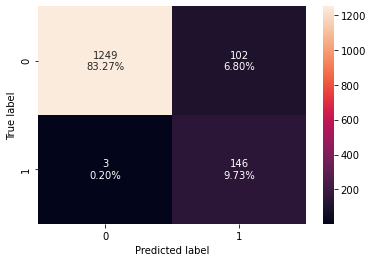

<IPython.core.display.Javascript object>

In [291]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [292]:
# Accuracy on train and test
print("Accuracy on test set : ", estimator.score(X_test, y_test))
print()
# Recall on test set
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Accuracy on test set :  0.93

Recall Score: 0.9798657718120806


<IPython.core.display.Javascript object>

* The model is giving a generalized result now. The precision gap between the training and the test set is reduced

## Visualizing the Decision Tree

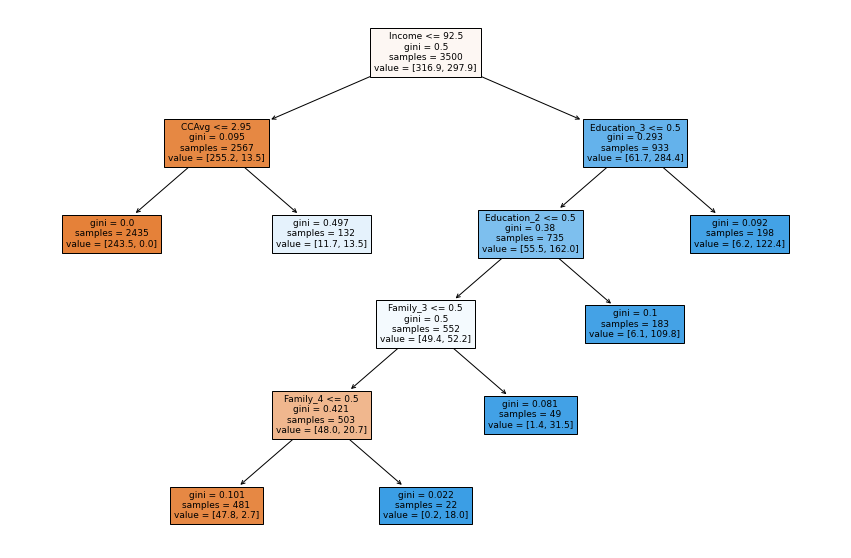

<IPython.core.display.Javascript object>

In [293]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [294]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.20, 18.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.40, 31.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.10, 109.80] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.20, 122.40] class: 1



<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer earns less than 92.5K dollars per year and spends less than 2.95K dollars on credit cards per month, then the customer will not accept purchasing the loan. But, if he earns less than 92.5K dollars per year and spends more than 2.95K dollars on credit cards per month, the customer will accept purchasing the loan.

In [295]:
# importance of features in the tree building (The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                            Imp
Income                 0.684586
Family_4               0.089037
Education_2            0.077395
Family_3               0.072826
CCAvg                  0.049835
Education_3            0.026322
Age                    0.000000
city_Pasadena          0.000000
city_Riverside         0.000000
city_Ridgecrest        0.000000
city_Redwood City      0.000000
city_Pomona            0.000000
city_Northridge        0.000000
city_Palo Alto         0.000000
city_Others            0.000000
city_Oakland           0.000000
city_Sacramento        0.000000
city_Newbury Park      0.000000
city_Roseville         0.000000
city_San Jose          0.000000
city_San Diego         0.000000
city_San Francisco     0.000000
city_Moss Landing      0.000000
city_San Luis Obispo   0.000000
city_San Marcos        0.000000
city_Santa Barbara     0.000000
city_Santa Clara       0.000000
city_Santa Clarita     0.000000
city_Santa Cruz        0.000000
city_Santa Monica      0.000000
city_Sta

<IPython.core.display.Javascript object>

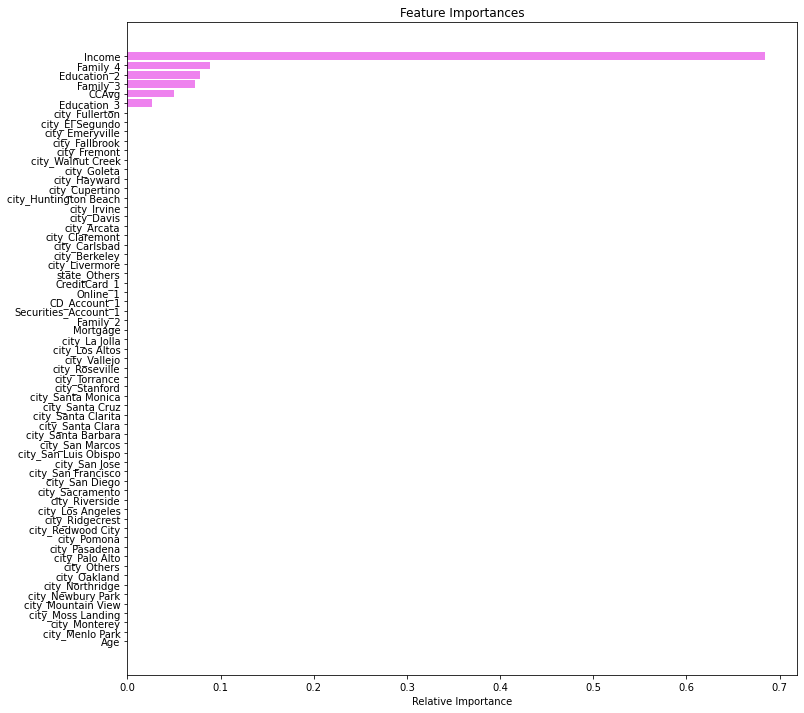

<IPython.core.display.Javascript object>

In [296]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree, Income is the most important feature followed by CCAvg.

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as ``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha`` increase the number of nodes pruned. Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha`` based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ``ccp_alpha`` could be appropriate, scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.


In [297]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [298]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-5.389313e-16
1,1.805828e-19,-5.387507e-16
2,3.250490e-19,-5.384257e-16
3,6.500981e-19,-5.377756e-16
4,6.500981e-19,-5.371255e-16
5,1.011264e-18,-5.361142e-16
6,1.300196e-17,-5.231122e-16
7,2.275343e-17,-5.003588e-16
8,5.265794e-17,-4.477009e-16
9,2.419448e-16,-2.057560e-16


<IPython.core.display.Javascript object>

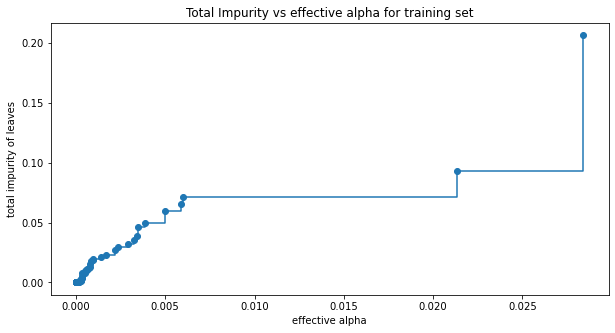

<IPython.core.display.Javascript object>

In [299]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [300]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2928785401980035


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

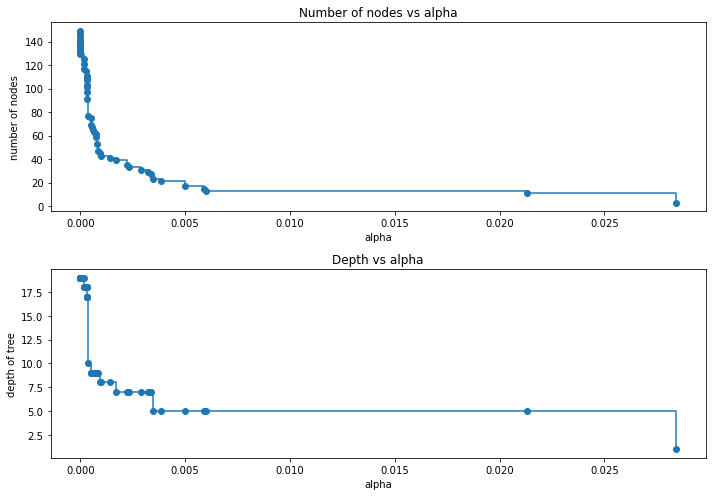

<IPython.core.display.Javascript object>

In [301]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [302]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [303]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [304]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

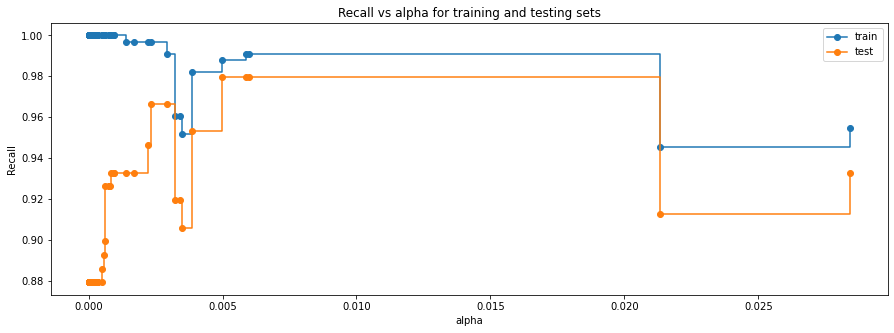

<IPython.core.display.Javascript object>

In [305]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Precision is at 0.029 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.004 retaining information and getting higher precision.**

In [306]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004980603234981205,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [307]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004980603234981205,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

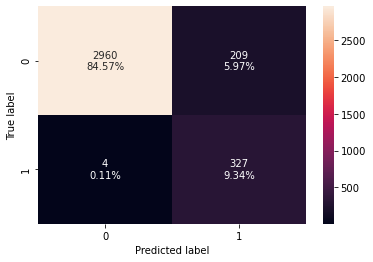

<IPython.core.display.Javascript object>

In [308]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [309]:
# Accuracy on train and test
print("Accuracy on training set : ", best_model.score(X_train, y_train))
print()
# Recall on train set
decision_tree_tune_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Accuracy on training set :  0.9391428571428572

Recall Score: 0.9879154078549849


<IPython.core.display.Javascript object>

#### checking performance on test set

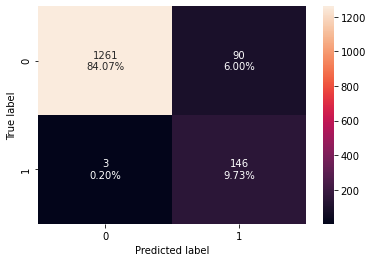

<IPython.core.display.Javascript object>

In [310]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [311]:
# Accuracy on train and test
print("Accuracy on test set : ", best_model.score(X_test, y_test))
print()
# Recall on test set
decision_tree_tune_perf_test = get_recall_score(best_model, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Accuracy on test set :  0.938

Recall Score: 0.9798657718120806


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

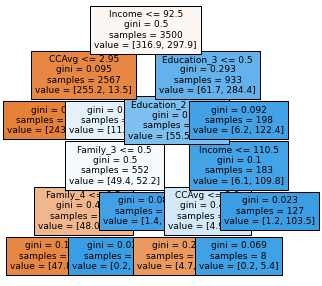

<IPython.core.display.Javascript object>

In [312]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [313]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.20, 18.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.40, 31.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [4.70, 0.90] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [0.20, 5.40] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [1.20, 103.50] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.20, 122.40] class: 1



<IPython.core.display.Javascript object>

* This model is giving the highest recall and a buisness would be able to use it to actually target the potential customers.

* Creating model with 0.006 ccp_alpha

In [314]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.006, class_weight={0: 0.1, 1: 0.9}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on the training set

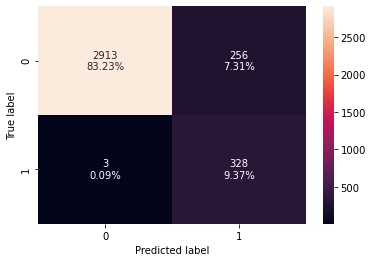

<IPython.core.display.Javascript object>

In [315]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [316]:
# Accuracy on train and test
print("Accuracy on training set : ", best_model2.score(X_train, y_train))
print()
# Recall on train set
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Accuracy on training set :  0.926

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

### Checking performance on the test set

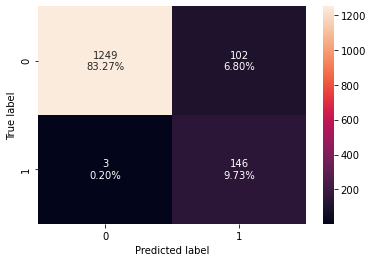

<IPython.core.display.Javascript object>

In [317]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [318]:
# Accuracy on train and test
print("Accuracy on test set : ", best_model2.score(X_test, y_test))
print()
# Recall on test set
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Accuracy on test set :  0.93

Recall Score: 0.9798657718120806


<IPython.core.display.Javascript object>

* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

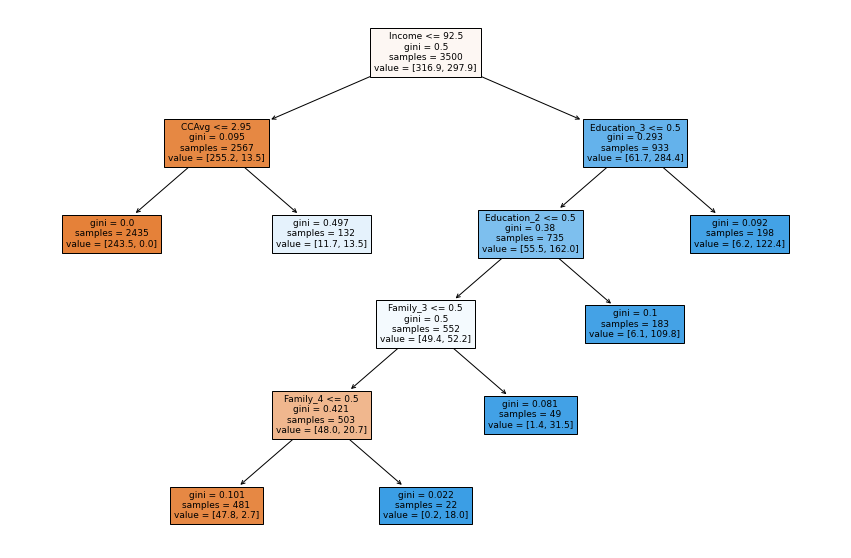

<IPython.core.display.Javascript object>

In [319]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [320]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.20, 18.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.40, 31.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.10, 109.80] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.20, 122.40] class: 1



<IPython.core.display.Javascript object>

In [321]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
Income                 0.684586
Family_4               0.089037
Education_2            0.077395
Family_3               0.072826
CCAvg                  0.049835
Education_3            0.026322
Age                    0.000000
city_Pasadena          0.000000
city_Riverside         0.000000
city_Ridgecrest        0.000000
city_Redwood City      0.000000
city_Pomona            0.000000
city_Northridge        0.000000
city_Palo Alto         0.000000
city_Others            0.000000
city_Oakland           0.000000
city_Sacramento        0.000000
city_Newbury Park      0.000000
city_Roseville         0.000000
city_San Jose          0.000000
city_San Diego         0.000000
city_San Francisco     0.000000
city_Moss Landing      0.000000
city_San Luis Obispo   0.000000
city_San Marcos        0.000000
city_Santa Barbara     0.000000
city_Santa Clara       0.000000
city_Santa Clarita     0.000000
city_Santa Cruz        0.000000
city_Santa Monica      0.000000
city_Sta

<IPython.core.display.Javascript object>

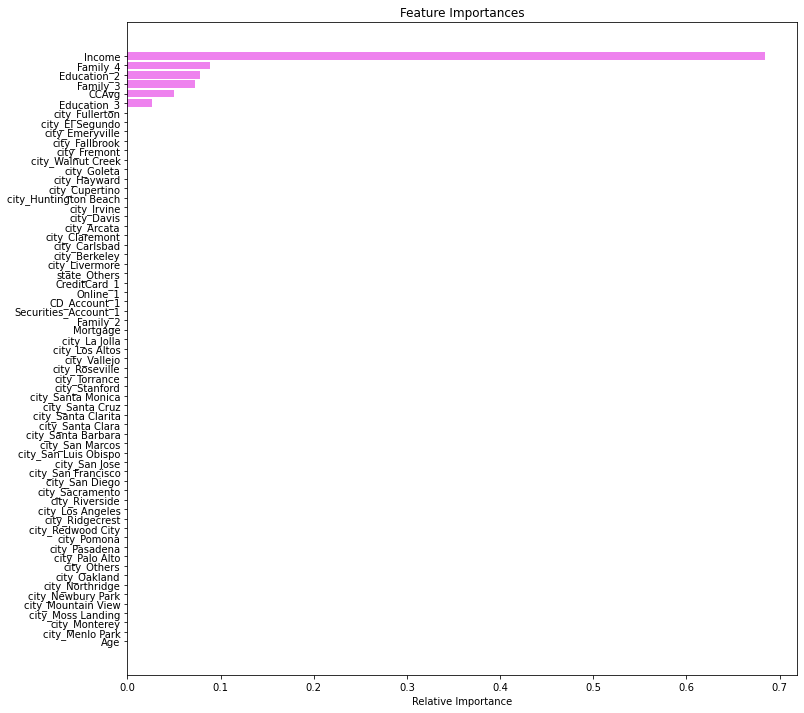

<IPython.core.display.Javascript object>

In [322]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Family_4 are the top two important features to predict customer probability of purchasing the loan

## Comparing all the decision tree models

In [323]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.987915
2,0.990937


<IPython.core.display.Javascript object>

In [324]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.879195
1,0.979866
2,0.979866


<IPython.core.display.Javascript object>

## Conclusion on Decision Tree model

* Decision tree model with post-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

* Here too, we have been able to build another predictive model that can be used by the bank to help the marketing department to identify the potential customers who have a higher probability of purchasing the loan. 
*In the pruned model, the most important Coefficients to identifying customers with higher probability of purchasing the loan are respectively Income, Family_4, Education_2, Family_3, CCAvg and Education_3
* We established the importance of hyper-parameters/ pruning to reduce overfitting

                 




## Recommandations on Decision Tree model

* The bank should better target customers earning more than 92.5K dollars per year and who monthly spend more 2.5K dollars on credit card. Furthermore, the bank should also focus on customers that graduate and more and who have 3 or 4 family size

# Conclusion

* We have analyzed the "bank custumers loan behaviors" using different techniques, Logistic Regression and Decision Tree Classifier to build a model to help the bank improving its success ratio.
* The models built can be used to predict if a customer is going to purchase the loan or not.
* We improved the performance of each of both models built. Logistic Regression with different threshold and Decision Tree with pruning. We visualized for each model their confusion matrix to get a better understanding of the model.
* Decision Trees have an easy interpretation
* We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave wonderful results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
* The Decision Tree gives us better predictions than Logistic Regression as f1_score in Logistic regression is less than 0.8 on both train and test sets whereas the Decision Tree recall is more 0.97 in the train and test sets. 
* The Decision Tree model is more generalized than the Logistic Regression.

# Recommandations

Base on the decision tree model which is the model the bank should choose:

a) If a customer earns less than 92.5K dollars per year, there is a high chance the customer will not purchase the loan

b) If the customer earns more than 92.5K dollars per year and spend more than 2.5K dollars on credit card per month, then there is a very high chance that the customer is going to buy the loan

* It is observed in addition that more the customer is graduate and has an important family size, more he is likelihood to purchase the loan. Although the bank don't really know the financial needs of depositors, it can enhance the customer experience, through these indicators, to engage them in more on loans.